<a href="https://colab.research.google.com/github/Kudasai03/DataVisualization/blob/main/EDA_BDTQ_NHOM7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install gdown

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import string
import gdown
from scipy import stats
from matplotlib import font_manager as fm

In [ ]:
!gdown 10cV9FiQxGY4Uy4ushJDIvXoUjHGFAhI6

Downloading...
From: https://drive.google.com/uc?id=10cV9FiQxGY4Uy4ushJDIvXoUjHGFAhI6
To: /content/data_type.xlsx
100% 552k/552k [00:00<00:00, 6.77MB/s]


# **CHƯƠNG III: Tiền xử lí dữ liệu**

## NAVIGATION

In [ ]:
df = pd.read_excel('/content/data_type.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,4.0,1,13,1,2,1,22,27,10,...,0,7,7,0,0.000000,0,12.7,3.7,-1.70,Dropout
1,2.0,12.0,1,4,1,3,1,3,14,5,...,6,12,14,12,17.692308,0,16.2,0.3,-0.92,Graduate
2,2.0,12.0,1,7,1,1,1,19,24,1,...,0,5,9,2,13.000000,0,9.4,-0.8,-3.12,Dropout
3,1.0,12.0,1,8,1,1,1,1,14,5,...,0,5,10,3,13.333333,2,10.8,1.4,1.74,Dropout
4,1.0,14.0,1,7,1,1,1,22,28,6,...,0,5,11,1,17.000000,0,13.9,-0.3,0.79,Dropout


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4398 non-null   float64
 1   Application mode                                4289 non-null   float64
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

## 3.1. EDA

In [ ]:
# Phần trăm các cột các dữ liệu bị thiếu
for col in df:
    missing_value = df[col].isnull().sum()
    if missing_value > 0:
        print(f"Phần trăm dữ liệu bị thiếu ở cột {col}: {missing_value*100/df.shape[0]:.5f} % \n")

Phần trăm dữ liệu bị thiếu ở cột Marital status: 0.58770 % 

Phần trăm dữ liệu bị thiếu ở cột Application mode: 3.05154 % 

Phần trăm dữ liệu bị thiếu ở cột Age at enrollment: 1.96655 % 



<ipython-input-25-f911770d5523>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


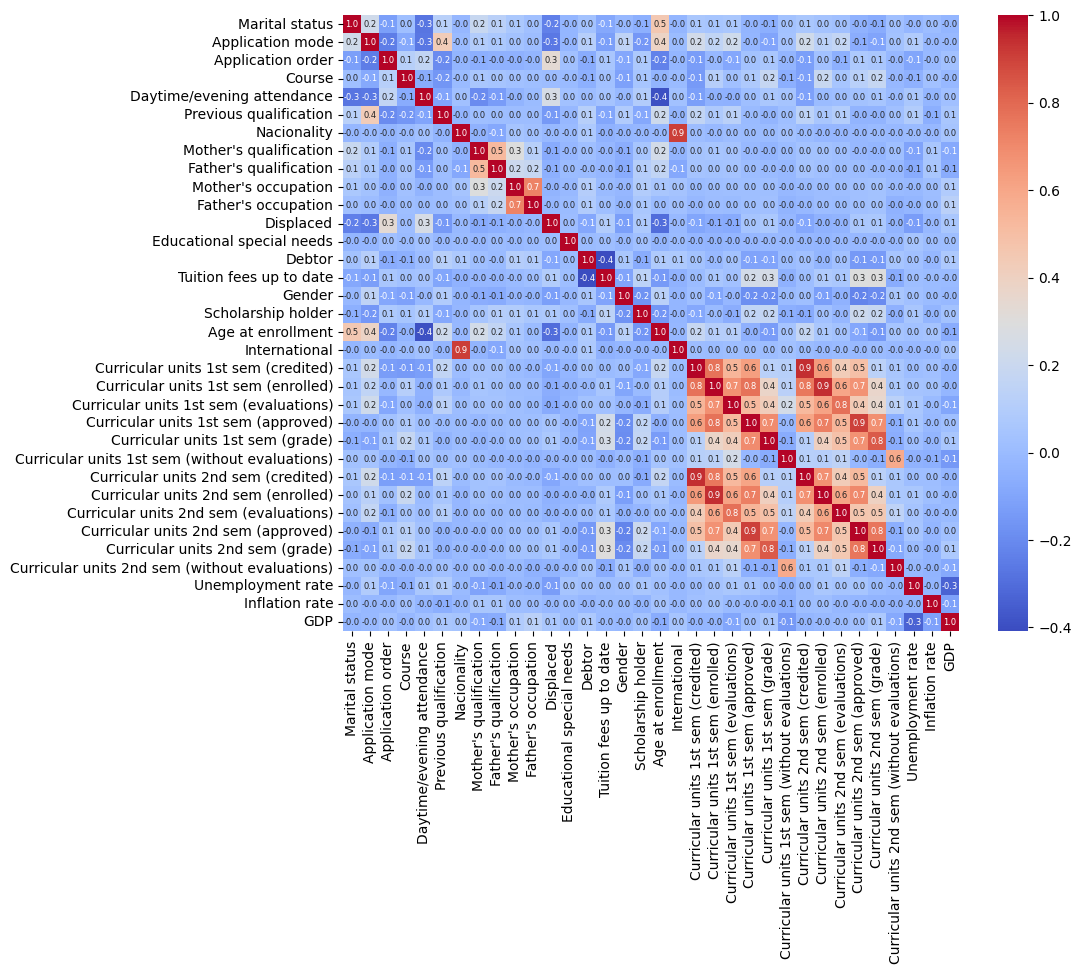

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    annot_kws={"size": 6},
    square=True
)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### 3.1.1 Chỉnh dạng dữ liệu

In [ ]:
# Chuyển về định dạng lowercase
df.columns = [col.lower() for col in df.columns]

In [ ]:
# Liệt kê ra có các cột có tên đặc biệt (chứa 's ; () )
special_columns_name = []
for col in df.columns:
    if re.search(r"('s[ ])|(\s\()", col):
        special_columns_name.append(col)
        cols_to_rename = [val for val in df.columns if val not in special_columns_name]
renamed = [val.replace(" ","_") for val in cols_to_rename]
dictr = {key: value for key, value in zip(cols_to_rename, renamed)}
df.rename(columns=dictr,inplace=True)

In [ ]:
# Liệt kê ra có các cột có tên đặc biệt (chứa 's ; () )
special_columns_name = []
for col in df.columns:
    if re.search(r"('s[ ])|(\s\()", col):
        special_columns_name.append(col)
        cols_to_rename = [val for val in df.columns if val not in special_columns_name]
renamed = [val.replace(" ","_") for val in cols_to_rename]
dictr = {key: value for key, value in zip(cols_to_rename, renamed)}
df.rename(columns=dictr,inplace=True)
special_columns_name

["mother's qualification",
 "father's qualification",
 "mother's occupation",
 "father's occupation",
 'curricular units 1st sem (credited)',
 'curricular units 1st sem (enrolled)',
 'curricular units 1st sem (evaluations)',
 'curricular units 1st sem (approved)',
 'curricular units 1st sem (grade)',
 'curricular units 1st sem (without evaluations)',
 'curricular units 2nd sem (credited)',
 'curricular units 2nd sem (enrolled)',
 'curricular units 2nd sem (evaluations)',
 'curricular units 2nd sem (approved)',
 'curricular units 2nd sem (grade)',
 'curricular units 2nd sem (without evaluations)']

In [ ]:
# Gộp những cột Curicular_units 1st vs 2nd vì nó có sự tương quan với nhau, và tổng lại thì nó là số tín chỉ trong 1 năm học
column_indexes = list(range(4,10))
column_suffixes = ['curicular_units_credited', 'curicular_units_enrolled', 'curicular_units_evals',
                   'curicular_units_grade', 'curicular_units_grade', 'curicular_units_without_evals']

# Tương tự với Parent_occupation
column_indexes2 = list(range(0,4))
column_suffixes2 = ['parent_occupation','parent_qualification']

for i, suffix in zip(column_indexes, column_suffixes):
    df[suffix] = df[special_columns_name[i]] + df[special_columns_name[i + 6]]
for i, suffix in zip(column_indexes2, column_suffixes2):
    df[suffix] = df[special_columns_name[i]] + df[special_columns_name[i + 2]]
df.drop(columns=special_columns_name,inplace=True)

#### 3.1.2 Phân tích sơ bộ

In [ ]:
df['marital_status_decode'] = df['marital_status'].replace({1: 'Độc thân', 2: 'Kết hôn', 3: 'Góa phụ', 4: 'Ly hôn', 5: 'Sống thử', 6: 'Ly thân'})
df['gender_decode'] = df['gender'].replace({1: 'Nam', 0: 'Nữ'})

Text(0.5, 1.0, 'Biểu đồ biểu diễn tổng quan biến Target')

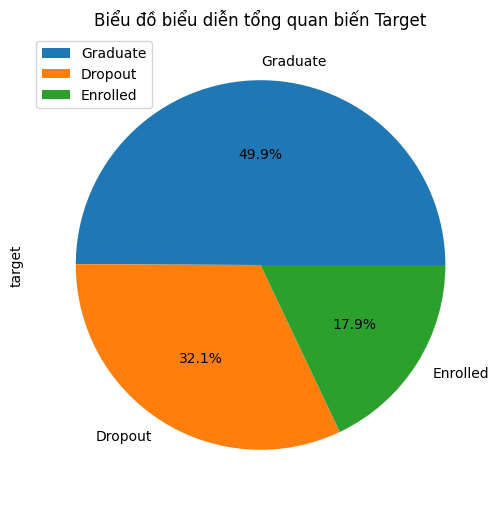

In [ ]:
# Tổng quan biến Target theo pie chart
plt.figure(figsize=(12,6))
df['target'].value_counts().plot(kind="pie",autopct='%1.1f%%',)
plt.legend(loc='upper left')
plt.title('Biểu đồ biểu diễn tổng quan biến Target')

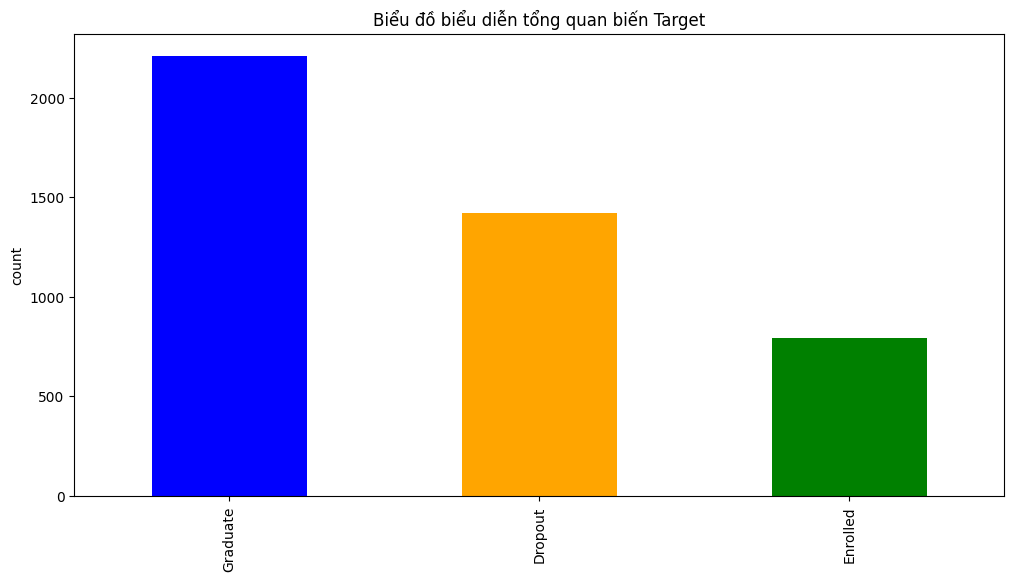

In [ ]:
plt.figure(figsize=(12,6))
df['target'].value_counts().plot(kind="bar",color=['blue','orange','green'])
plt.title('Biểu đồ biểu diễn tổng quan biến Target')
plt.ylabel('count')
plt.show()

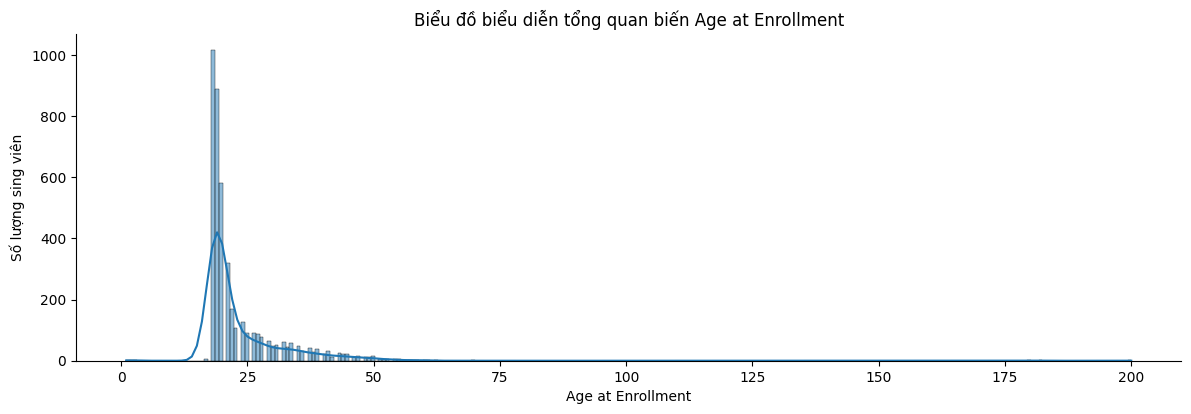

count    4337.000000
mean       23.387134
std         9.098743
min         1.000000
25%        19.000000
50%        20.000000
75%        25.000000
max       200.000000
Name: age_at_enrollment, dtype: float64


In [ ]:
sns.displot(data=df, height=4, aspect=3, x='age_at_enrollment', kde=True)
df['age_at_enrollment'].describe()
plt.xlabel('Age at Enrollment')
plt.ylabel('Số lượng sing viên')
plt.title('Biểu đồ biểu diễn tổng quan biến Age at Enrollment')
plt.show()

# Thống kê mô tả
description_stats = df['age_at_enrollment'].describe()
print(description_stats)

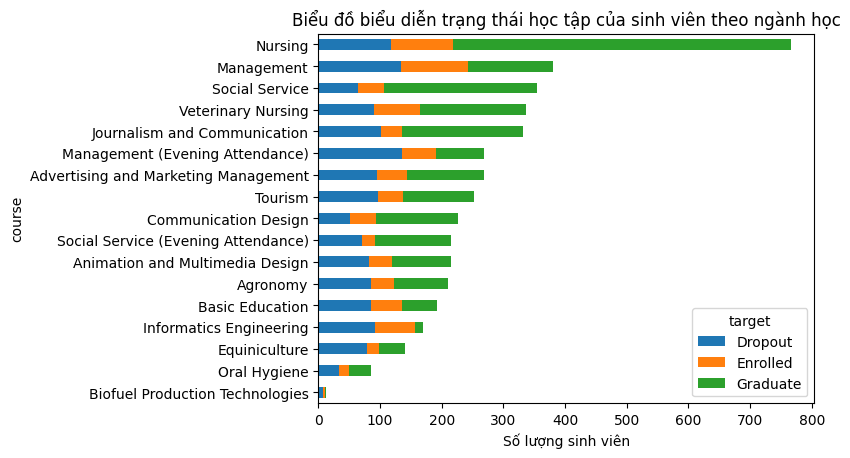

In [ ]:
student_course = df.groupby(['course', 'target']).size().reset_index().pivot(columns='target', index='course', values=0)
student_course = student_course.rename(index={1:'Biofuel Production Technologies',2:'Animation and Multimedia Design',3:'Social Service (Evening Attendance)',4:'Agronomy',5:'Communication Design',6:'Veterinary Nursing',7:'Informatics Engineering',8:'Equiniculture',9:'Management',10:'Social Service',11:'Tourism',12:'Nursing',13:'Oral Hygiene',14:'Advertising and Marketing Management',15:'Journalism and Communication',16:'Basic Education',17:'Management (Evening Attendance)'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

plt.xlabel('Số lượng sinh viên')
plt.title('Biểu đồ biểu diễn trạng thái học tập của sinh viên theo ngành học')
plt.show()

## 3.2 Xử lí giá trị bị thiếu

a. Marital status

In [ ]:
for col in df:
    missing_value = df[col].isnull().sum()
    if missing_value > 0:
        print(f"{col}: missing_value")

marital_status: missing_value
application_mode: missing_value
age_at_enrollment: missing_value
marital_status_decode: missing_value


In [ ]:
import plotly.express as px
value_counts = df['marital_status_decode'].value_counts()
marital_distribution = pd.DataFrame({'marital_status_decode': value_counts.index, 'Count_T': value_counts.values})
fig = px.pie(marital_distribution, names='marital_status_decode', values='Count_T', title='Biểu đồ tròn thể hiện tỉ lệ các giá trị trong biến Marital Status')
fig.update_traces(hole=0.4, textinfo='percent+label', pull=[0, 0.2, 0.1])
fig.show()

In [ ]:
df['marital_status'] = df['marital_status'].fillna(df['marital_status'].mode()[0])

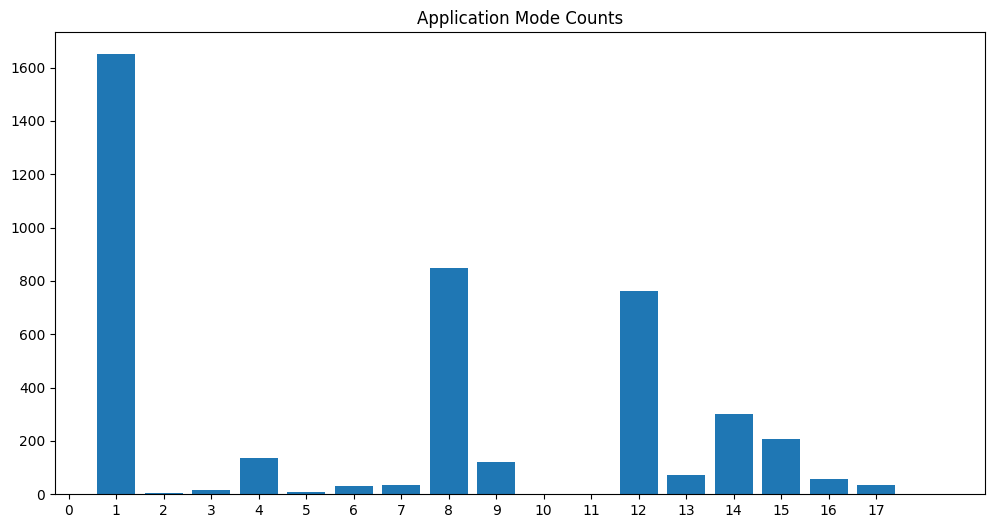

In [ ]:
# Kiểm tra giá trị cột Application mode
fig, axs = plt.subplots(figsize=(12, 6))
application_value_counts = df['application_mode'].value_counts()
axs.bar(application_value_counts.index, application_value_counts)
axs.set_title('Application Mode Counts')
axs.set_xticks(range(len(application_value_counts.index)))
plt.show()

In [ ]:
application_mode_value = int(df['application_mode'].mode().values)
print(f"Trung bình giá trị của phương thức nhập học: {application_mode_value}")
application_median_value = df['application_mode'].median()
print(f"Trung vị giá trị của phương thức nhập học: {application_median_value}")

Trung bình giá trị của phương thức nhập học: 1
Trung vị giá trị của phương thức nhập học: 8.0


In [ ]:
df['application_mode'] = df['application_mode'].fillna(df['application_mode'].mode()[0])

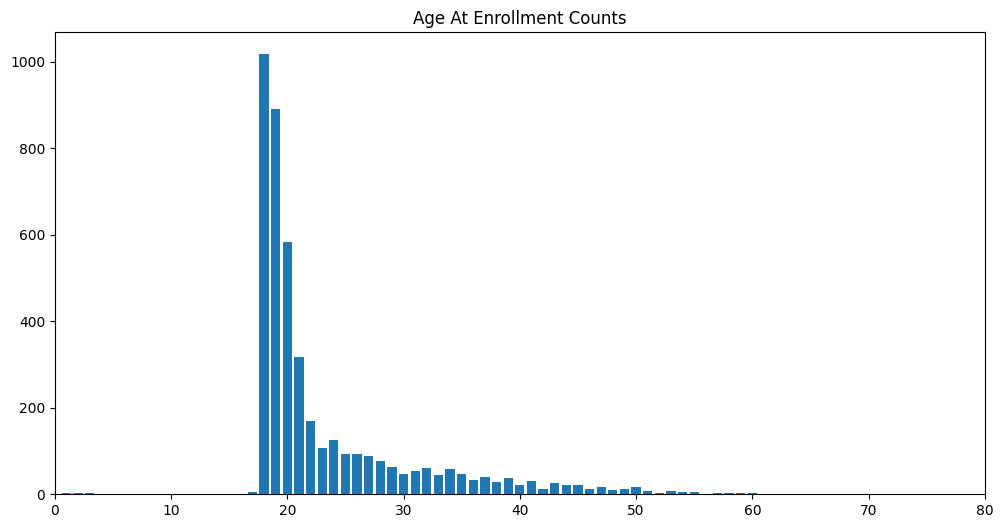

In [ ]:
# Kiểm tra giá trị cột Application mode
fig, axs = plt.subplots(figsize=(12, 6))
age_counts = df['age_at_enrollment'].value_counts()
axs.bar(age_counts.index, age_counts)
axs.set_title('Age At Enrollment Counts')
axs.set_xlim(0,80)
plt.show()

In [ ]:
age_mean_value = round(df['age_at_enrollment'].mean())
print(f"Trung bình của tuổi khi nhập học: {age_mean_value}")
age_median_value = df['age_at_enrollment'].median()
print(f"Trung vị của tuổi khi nhập học: {age_median_value}")

Trung bình của tuổi khi nhập học: 23
Trung vị của tuổi khi nhập học: 20.0


In [ ]:
# Thay thế missing values bằng giá trị trung bình
df['age_at_enrollment'] = df['age_at_enrollment'].fillna(round(age_median_value))

In [ ]:
df.isnull().sum()

marital_status                    0
application_mode                  0
application_order                 0
course                            0
daytime/evening_attendance        0
previous_qualification            0
nacionality                       0
displaced                         0
educational_special_needs         0
debtor                            0
tuition_fees_up_to_date           0
gender                            0
scholarship_holder                0
age_at_enrollment                 0
international                     0
unemployment_rate                 0
inflation_rate                    0
gdp                               0
target                            0
curicular_units_credited          0
curicular_units_enrolled          0
curicular_units_evals             0
curicular_units_grade             0
curicular_units_without_evals     0
parent_occupation                 0
parent_qualification              0
marital_status_decode            26
gender_decode               

## 3.3 Phân loại dữ liệu

In [ ]:
for col in df:
  if df[col].dtype == 'float64' and col not in ['unemployment_rate','inflation_rate','gdp']:
    df[col] = df[col].astype('int64')

In [ ]:
# Xác định các cột dữ liệu số:
numerical_features = [col for col in df.columns if col in df.select_dtypes(include='float64')]
numerical_features.extend(['age_at_enrollment','curicular_units_credited',
       'curicular_units_enrolled', 'curicular_units_evals',
       'curicular_units_grade', 'curicular_units_without_evals'])
print(f"{len(numerical_features)} features: {numerical_features}")

9 features: ['unemployment_rate', 'inflation_rate', 'gdp', 'age_at_enrollment', 'curicular_units_credited', 'curicular_units_enrolled', 'curicular_units_evals', 'curicular_units_grade', 'curicular_units_without_evals']


In [ ]:
# Xác định các cột dữ liệu Nhị phân:
binary_features = list()
for col in df:
    if all(value in range(2) for value in df[col].values):
        binary_features.append(col)
print(f"{len(binary_features)} features: {binary_features}")

8 features: ['daytime/evening_attendance', 'displaced', 'educational_special_needs', 'debtor', 'tuition_fees_up_to_date', 'gender', 'scholarship_holder', 'international']


In [ ]:
# Xác định các cột dữ liệu được gán nhãn:
labeled_features = [col for col in df.columns
                    if (col in df.select_dtypes(include='int').columns and col not in binary_features)
                    and col not in numerical_features]
print(f"{len(labeled_features)} features: {labeled_features}")

8 features: ['marital_status', 'application_mode', 'application_order', 'course', 'previous_qualification', 'nacionality', 'parent_occupation', 'parent_qualification']


In [ ]:
bool(len(df.columns) - (len(binary_features) + len(labeled_features) + len(numerical_features))  == 1)

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   marital_status                 4424 non-null   int64  
 1   application_mode               4424 non-null   int64  
 2   application_order              4424 non-null   int64  
 3   course                         4424 non-null   int64  
 4   daytime/evening_attendance     4424 non-null   int64  
 5   previous_qualification         4424 non-null   int64  
 6   nacionality                    4424 non-null   int64  
 7   displaced                      4424 non-null   int64  
 8   educational_special_needs      4424 non-null   int64  
 9   debtor                         4424 non-null   int64  
 10  tuition_fees_up_to_date        4424 non-null   int64  
 11  gender                         4424 non-null   int64  
 12  scholarship_holder             4424 non-null   i

CORRELATION OVERVIEW

In [ ]:
df['target_labeled'] = df['target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

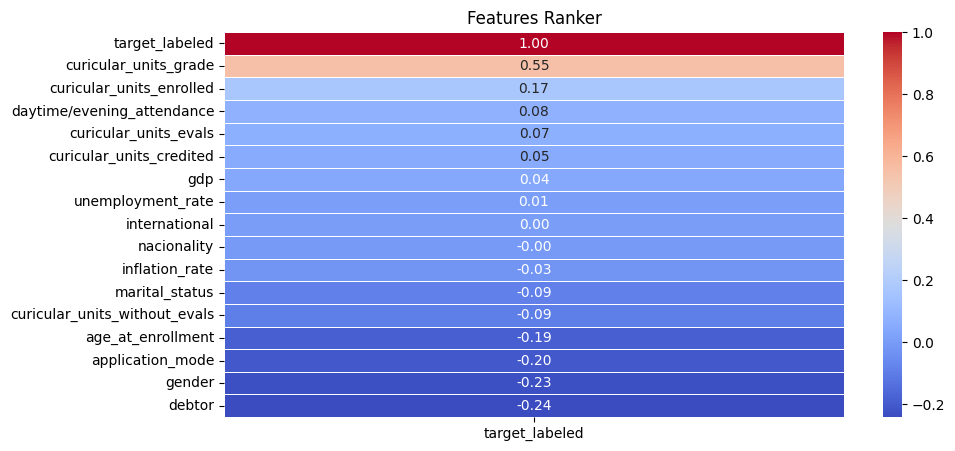

In [ ]:
selected_columns = ['application_mode', 'age_at_enrollment', 'curicular_units_credited', 'curicular_units_enrolled',
                    'curicular_units_evals', 'curicular_units_grade','nacionality','marital_status',
                    'curicular_units_without_evals','gender','debtor','international','daytime/evening_attendance',
                    'unemployment_rate', "inflation_rate", "gdp", "target_labeled"]
selected_df = df[selected_columns]
correlation_matrix = selected_df.corr().sort_values(by='target_labeled', ascending=False)
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix[['target_labeled']], annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Features Ranker')
plt.show()

## 3.4 Xử lí outliers

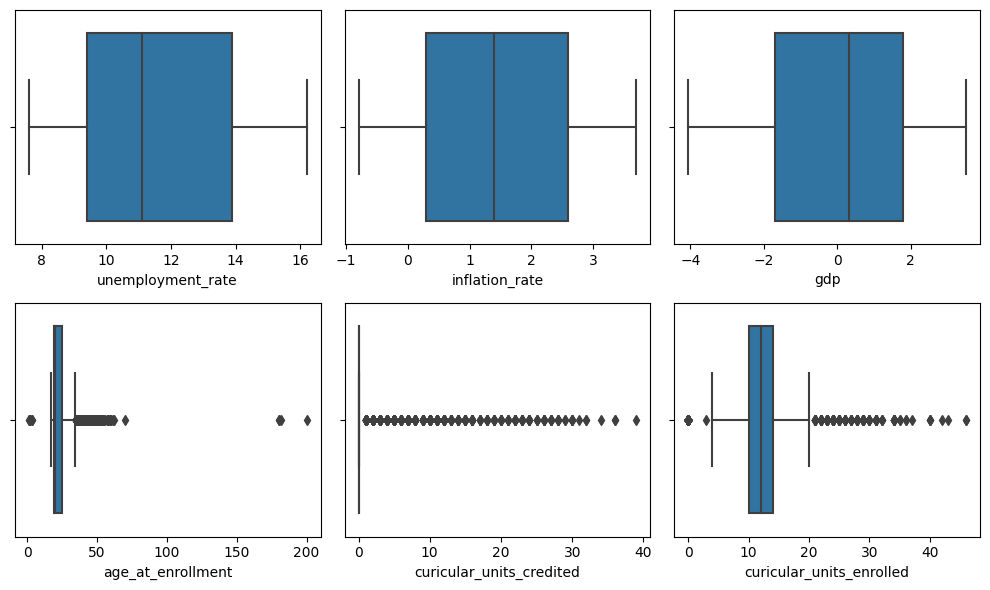

In [ ]:
cols = [element for element in numerical_features]
n_rows=2
n_cols=3
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_rows*5,n_cols*2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.boxplot(data=df,x=cols[i],ax=ax_i)
plt.tight_layout()

Nhận xét:
- Các số liệu về tỷ lệ lạm phát hoặc tỷ lệ thât nghiệp, gdp đều không chưa ngoại lai. Chỉ có thuộc tính tuổi chứa nhiều ngoại lai hoặc siêu ngoại lai nên sẽ chỉ loại ngoại lai cho cột age_at_enrollment
- Các biến khác đều là biến phân loại được gán nhãn nên sẽ không được coi là ngoại lai

In [ ]:
Q1 = df['age_at_enrollment'].quantile(0.25)
Q3 = df['age_at_enrollment'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (4 * IQR)

df = df[~((df['age_at_enrollment'] < lower_bound) | (df['age_at_enrollment'] > upper_bound))]

## 3.5 Biễu diễn trực quan sau khi xử lý

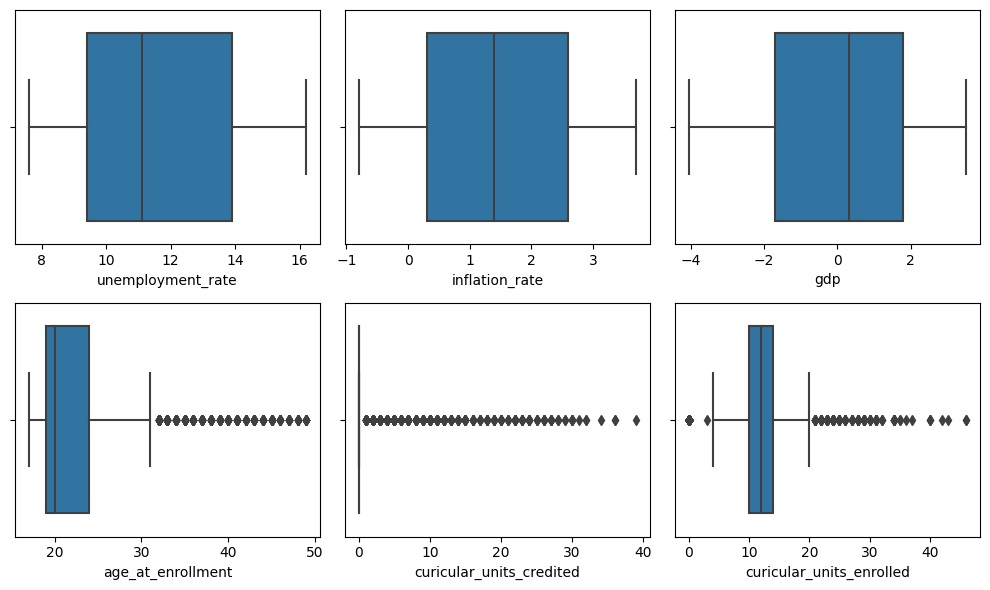

In [ ]:
cols = [element for element in numerical_features]
n_rows=2
n_cols=3
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_rows*5,n_cols*2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.boxplot(data=df,x=cols[i],ax=ax_i)
plt.tight_layout()

**# Biểu diễn trực quan sau khi xử lí**

In [ ]:
selected_numcols = [col for col in numerical_features if col in selected_df.columns]
selected_bincols = [col for col in binary_features if col in selected_df.columns]
selected_labcols = [col for col in labeled_features if col in selected_df.columns]
print(f"""Những thuộc tính số quan tâm :{selected_numcols}
Những thuộc tính nhị phân quan tâm: {selected_bincols}
Những thuộc tính phân loại quan tâm: {selected_labcols}""")

Những thuộc tính số quan tâm :['unemployment_rate', 'inflation_rate', 'gdp', 'age_at_enrollment', 'curicular_units_credited', 'curicular_units_enrolled', 'curicular_units_evals', 'curicular_units_grade', 'curicular_units_without_evals']
Những thuộc tính nhị phân quan tâm: ['daytime/evening_attendance', 'debtor', 'gender', 'international']
Những thuộc tính phân loại quan tâm: ['marital_status', 'application_mode', 'nacionality']


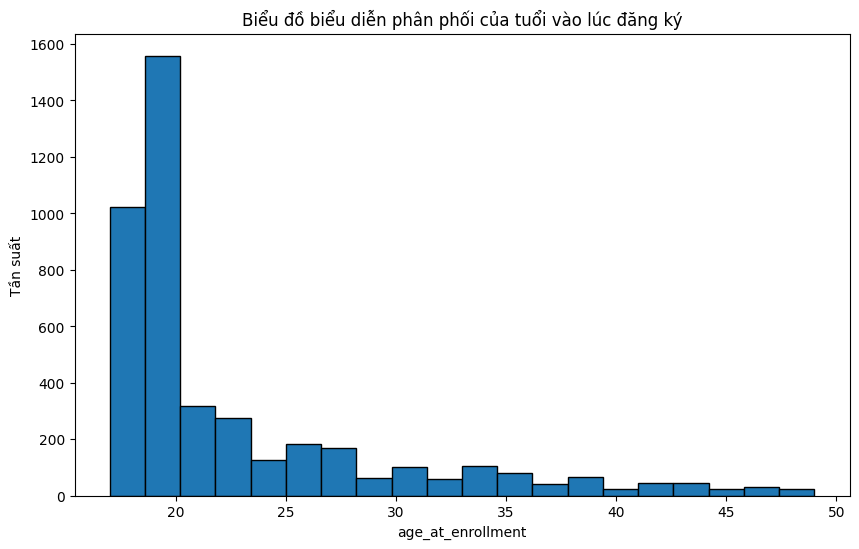

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['age_at_enrollment'], bins=20, edgecolor='black')
plt.title(f'Biểu đồ biểu diễn phân phối của tuổi vào lúc đăng ký')
plt.xlabel('age_at_enrollment')
plt.ylabel('Tần suất')
plt.show()

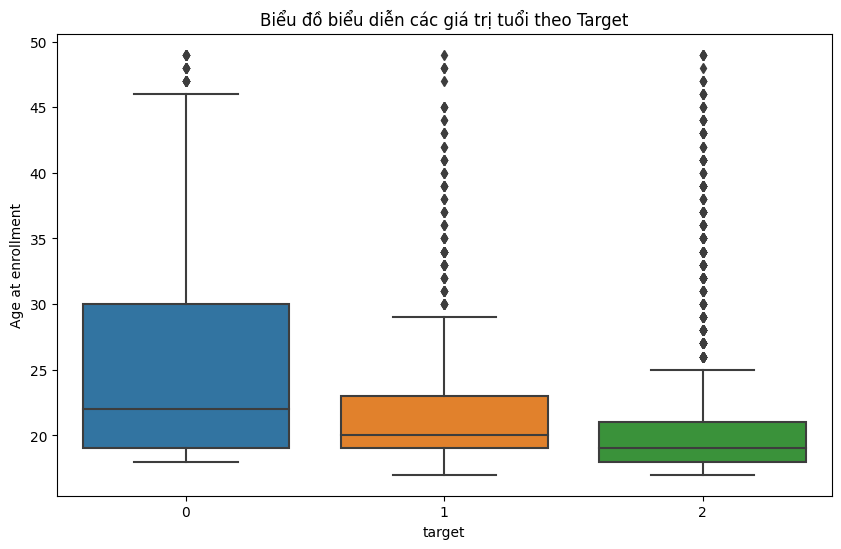

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target_labeled', y='age_at_enrollment', data=df)
plt.xlabel('target')
plt.ylabel('Age at enrollment')
plt.title('Biểu đồ biểu diễn các giá trị tuổi theo Target')
plt.show()

# **CHƯƠNG IV: Biểu diễn trực quan dữ liệu**

* BIỂU DIỄN TỔNG QUAN

4: ['daytime/evening_attendance', 'debtor', 'gender', 'international']




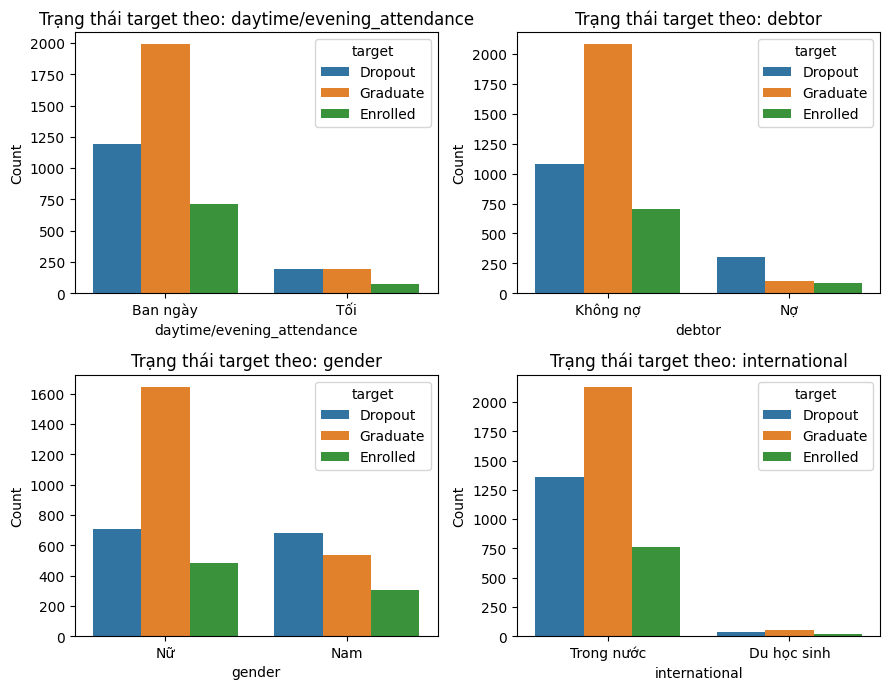

In [ ]:
cols = [element for element in selected_bincols]
print(f"{len(cols)}: {cols}\n\n")
n_rows=3
n_cols=2
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_rows*3,n_cols*5))
mapping = {
    'daytime/evening_attendance': {0: 'Tối', 1: 'Ban ngày'},
    'debtor': {0: 'Không nợ', 1: 'Nợ'},
    'gender': {0: 'Nữ', 1: 'Nam'},
    'international': {0: 'Trong nước', 1: 'Du học sinh'},
}
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r, c]
            col = cols[i]
            mapped_data = df[col].map(mapping[col])
            sns.countplot(df,x=mapped_data,hue='target', ax=ax_i)
            ax_i.set_title(f'Trạng thái target theo: {col}')
            ax_i.set_xlabel(f"{cols[i]}")
            ax_i.set_ylabel('Count')
ax.flat[-1].set_visible(False)
ax.flat[-2].set_visible(False)
plt.tight_layout()

### 4.1 Nhân khẩu học

**4.1.1  Biểu đồ biểu diễn trạng thái học tập của sinh viên theo giới tính**

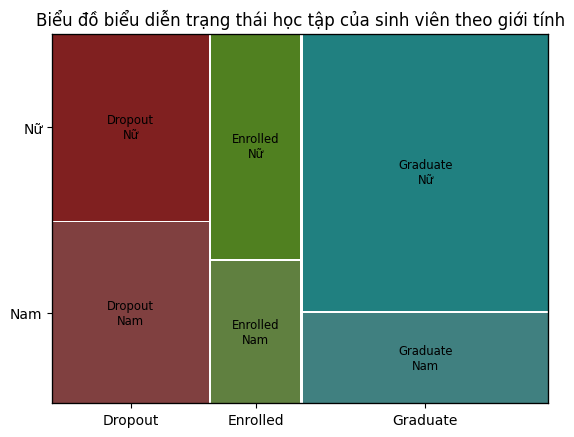

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

crosstable = pd.crosstab(df['target'], df['gender_decode'])
mosaic(crosstable.stack(), title='Biểu đồ biểu diễn trạng thái học tập của sinh viên theo giới tính')
plt.rcParams['figure.figsize'] = (8, 6)
plt.show()

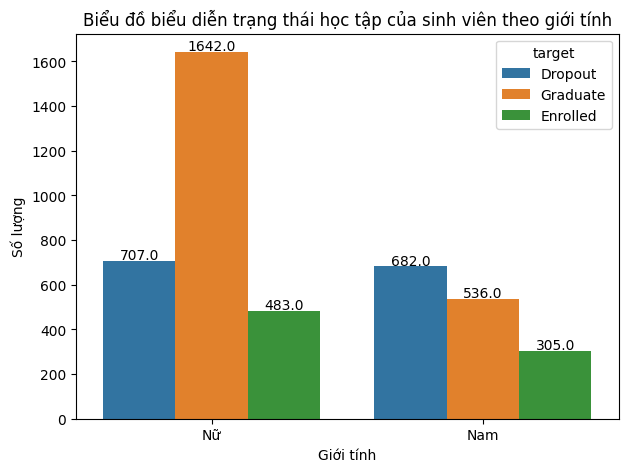

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='gender_decode', hue='target', data=df)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom', xytext=(0, -1), textcoords='offset points')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.title('Biểu đồ biểu diễn trạng thái học tập của sinh viên theo giới tính')
plt.show()


**4.1.2 Biểu đồ biểu diễn trạng thái học tập của sinh viên theo tình trạng hôn nhân**

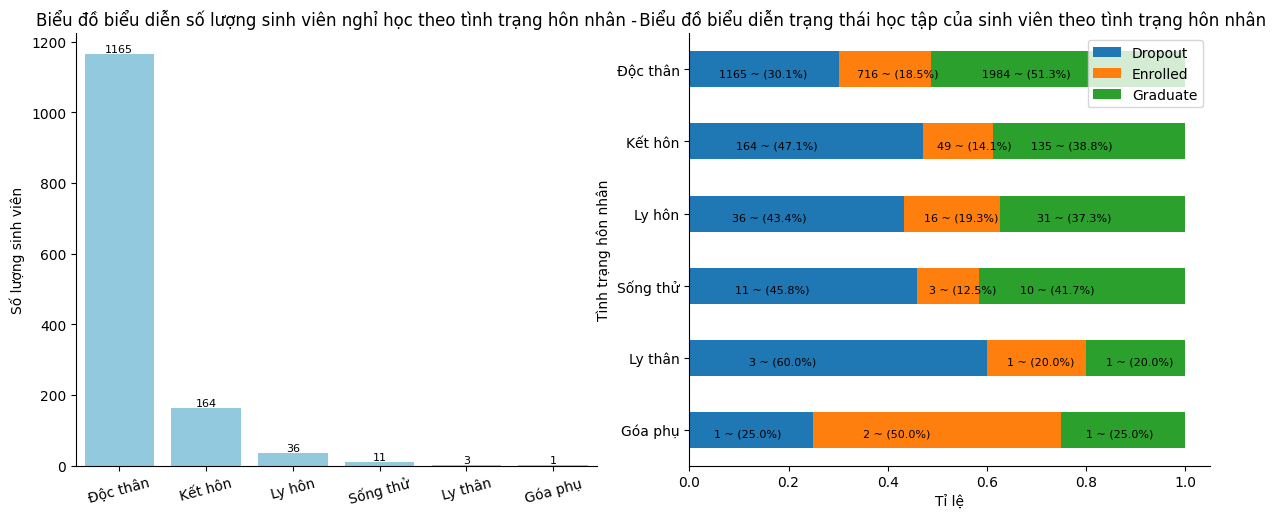

In [ ]:
fig = plt.figure(figsize=(12, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

ax1 = fig.add_subplot(gs[0, 0])
data = df[df['target'] == 'Dropout']['marital_status_decode'].value_counts()
order = data.index
ax1 = sns.barplot(data=data.to_frame(), y='marital_status_decode', x=data.index, color='skyblue', order=order)
ax1.set(xlabel=None, ylabel='Số lượng sinh viên')
ax1.bar_label(container=ax1.containers[0], labels=data, fontsize=8)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Biểu đồ biểu diễn số lượng sinh viên nghỉ học theo tình trạng hôn nhân -')
plt.xticks(rotation=15)

ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df['marital_status_decode'], columns=df['target'])
data_prop = pd.crosstab(index=df['marital_status_decode'], columns=df['target'], normalize='index')
data_prop.loc[order[::-1]].plot(ax=ax2, kind='barh', stacked=True)
ax2.set(xlabel='Tỉ lệ', ylabel='Tình trạng hôn nhân')
ax2.spines[['right', 'top']].set_visible(False)
ax2.legend_.set_title(None)
ax2.set_title(' Biểu đồ biểu diễn trạng thái học tập của sinh viên theo tình trạng hôn nhân')
plt.xticks(rotation=0)
for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.1, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)', fontsize=8)
plt.tight_layout(pad=0.001)
plt.show()

**4.1.3 Biểu đồ biểu diễn  tỷ lệ nhận học bổng theo trạng thái hôn nhân**

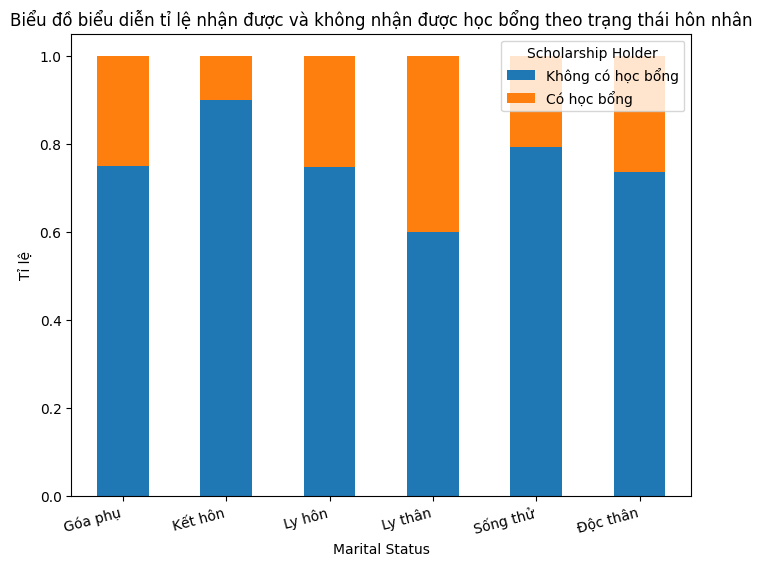

In [ ]:
marital_status_counts = df.groupby('marital_status_decode')['scholarship_holder'].value_counts(normalize=True).unstack()
ax = marital_status_counts.plot(kind='bar', stacked=True)
plt.title('Biểu đồ biểu diễn tỉ lệ nhận được và không nhận được học bổng theo trạng thái hôn nhân')
plt.xlabel('Marital Status')
plt.ylabel('Tỉ lệ')
plt.legend(title='Scholarship Holder', labels=['Không có học bổng', 'Có học bổng'])
plt.xticks(rotation=15, ha='right')
plt.show()

**4.1.4 Biểu đồ biểu diễn số lượng sinh viên trong nước và quốc tế theo trạng thái học tập của sinh viên**

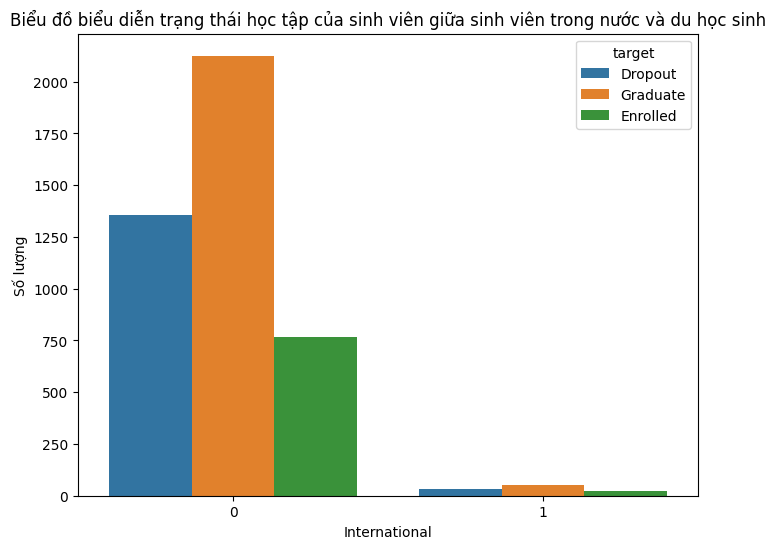

In [ ]:
plt.figure(figsize=(8, 6))
# Sửa lại tên cột
sns.countplot(x='international', hue='target', data=df)
plt.xlabel('International')
plt.ylabel('Số lượng')
plt.title('Biểu đồ biểu diễn trạng thái học tập của sinh viên giữa sinh viên trong nước và du học sinh')
plt.show()

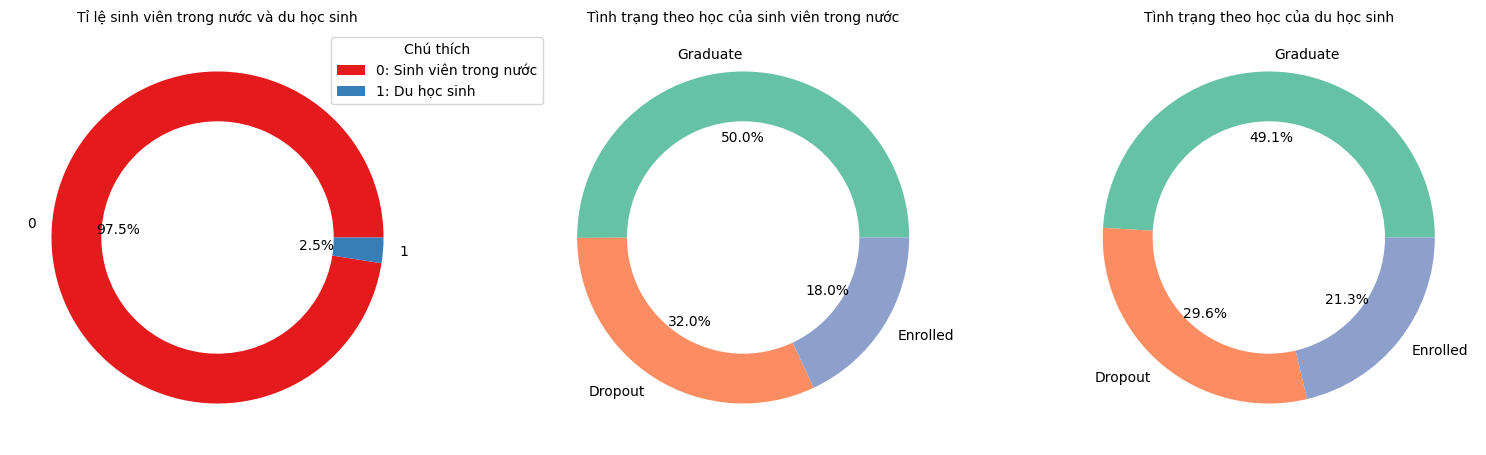

In [ ]:
# Tạo DataFrame mới chỉ chứa thông tin cần thiết
data_for_pie = df[['international', 'target']]

# Sắp xếp thứ tự các biến trong dữ liệu
order = df['target'].unique()

# Tăng kích thước của biểu đồ
plt.figure(figsize=(15, 6))

# Biểu đồ tròn tỉ lệ sinh viên trong nước và du học sinh
plt.subplot(1, 3, 1)
plt.title('Tỉ lệ sinh viên trong nước và du học sinh', fontproperties='Arial Unicode MS')
df['international'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set1'), wedgeprops=dict(width=0.3))
plt.ylabel('')  # Loại bỏ nhãn trục y để đẹp hơn
plt.legend(title='Chú thích', labels=['0: Sinh viên trong nước', '1: Du học sinh'], loc='upper right', bbox_to_anchor=(1.3, 1))

# Biểu đồ tròn tỉ lệ target trong nhóm Sinh viên trong nước
plt.subplot(1, 3, 2)
plt.title('Tình trạng theo học của sinh viên trong nước', fontproperties='Arial Unicode MS')
data_for_pie[data_for_pie['international'] == 0]['target'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2', n_colors=3), wedgeprops=dict(width=0.3))
plt.ylabel('')  # Loại bỏ nhãn trục y để đẹp hơn

# Biểu đồ tròn tỉ lệ target trong nhóm Du học sinh
plt.subplot(1, 3, 3)
plt.title('Tình trạng theo học của du học sinh', fontproperties='Arial Unicode MS')
data_for_pie[data_for_pie['international'] == 1]['target'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2', n_colors=3), wedgeprops=dict(width=0.3))
plt.ylabel('')  # Loại bỏ nhãn trục y để đẹp hơn

plt.tight_layout()
plt.show()

**4.1.5. Biểu đồ biểu diễn số lượng sinh viên theo khu vực**

In [ ]:
regions_mapping = {
    'European': [1, 2, 3, 4, 5, 6, 7, 13, 15, 16, 18, 19],
    'Latin american and caribean': [14, 17, 20, 21],
    'African': [8, 9, 10, 11, 12]
}

def map_to_region(index):
    for region, indices in regions_mapping.items():
        if index in indices:
            return region
    return 'Other'

df['region'] = df['nacionality'].apply(map_to_region)

1: European, 2: Latin american and caribean, 3: African

Với việc các quốc tịch đã dược label theo nhiều số khác nhau
1—Portuguese
2—German
3—Spanish
4—Italian
5—Dutch
6—English
7—Lithuanian
8—Angolan
9—Cape Verdean
10—Guinean
11—Mozambican
12—Santomean
13—Turkish
14—Brazilian
15—Romanian
16—Moldova (Republic of)
17—Mexican
18—Ukrainian
19—Russian
20—Cuban
21—Colombian

=> Thực hiện rời rạc hóa dữ liệu theo vùng

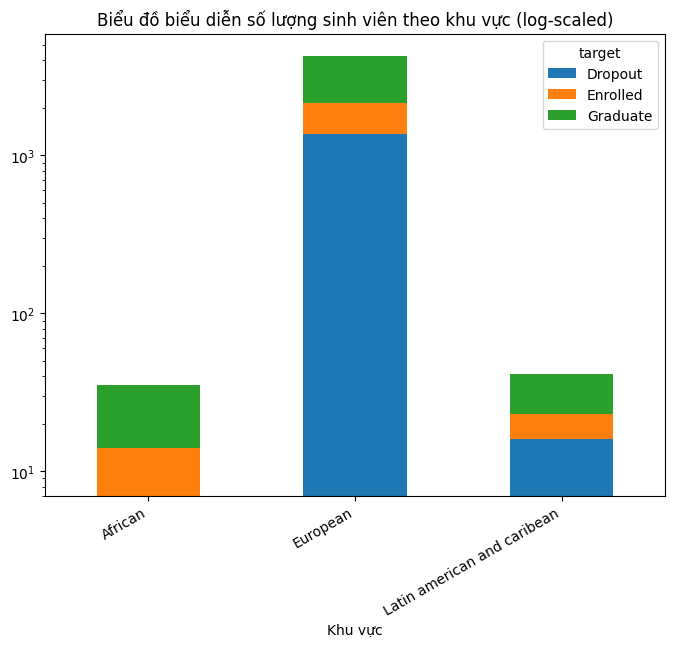

In [ ]:
crosstab_region = pd.crosstab(index=df['region'], columns=df['target'])
crosstab_region.plot(kind='bar', stacked=True)
plt.title("Biểu đồ biểu diễn số lượng sinh viên theo khu vực (log-scaled)")
plt.xlabel('Khu vực')
plt.yscale('log')
plt.xticks(rotation=30, ha='right')
plt.show()

In [ ]:
import plotly.express as px
from IPython.display import display

country_mapping = {
    1: 'Portugal',
    2: 'Germany',
    3: 'Spain',
    4: 'Italy',
    5: 'Netherlands',
    6: 'United Kingdom',
    7: 'Lithuania',
    8: 'Angola',
    9: 'Cape Verde',
    10: 'Guinea-Bissau',
    11: 'Mozambique',
    12: 'Sao Tome and Principe',
    13: 'Turkey',
    14: 'Brazil',
    15: 'Romania',
    16: 'Moldova',
    17: 'Mexico',
    18: 'Ukraine',
    19: 'Russia',
    20: 'Cuba',
    21: 'Colombia',
}


df['country'] = df['nacionality'].map(country_mapping)

country_student_counts = df['country'].value_counts().reset_index()
country_student_counts.columns = ['country', 'count']


fig = px.choropleth(
    country_student_counts,
    locations='country',
    locationmode='country names',
    color='count',
    hover_name='country',
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.update_layout(
    width=1000,
    height=600,
    margin={"r":0,"t":0,"l":0,"b":0}
)

# Show the figure
fig.show()
country_student_counts

,country,count
0,Portugal,4247
1,Brazil,37
2,Sao Tome and Principe,14
3,Cape Verde,13
4,Spain,13
5,Guinea-Bissau,5
6,Italy,3
7,Ukraine,3
8,Moldova,3
9,Mexico,2


**4.1.6 Biểu đồ biểu diễn số lượng sinh viên theo Giới tính, Buổi học, Tình trạng nợ và Tình trạng học**

In [ ]:
color_map = {
    'Dropout': 'black',
    'Enrolled': 'orange',
    'Graduate': 'green',  }

df['color'] = df['target'].map(color_map)

fig = px.parallel_categories(df,
    dimensions=['marital_status_decode','daytime/evening_attendance', 'gender_decode', 'debtor', 'target'],
    color='color',
    labels={'marital_status_decode': 'Tình trạng hôn nhân','daytime/evening_attendance': 'Buổi học (sáng/chiều)', 'gender_decode': 'Giới tính', 'debtor': 'Tình trạng nợ', 'target': 'Tình trạng học'},
    title='Biểu đồ biểu diễn số lượng sinh viên theo Giới tính, Buổi học, Tình trạng nợ và Tình trạng học',
    width=1200
)

fig.update_traces(line_shape='hspline', hoverinfo='count+probability')
# fig.write_html("fig.html")
fig.show()

### 4.2 Tình hình kinh tế

**4.2.1Biểu đồ biểu diễn sự tương quan giữa tình trạng học tập và tỉ lệ thất nghiệp**

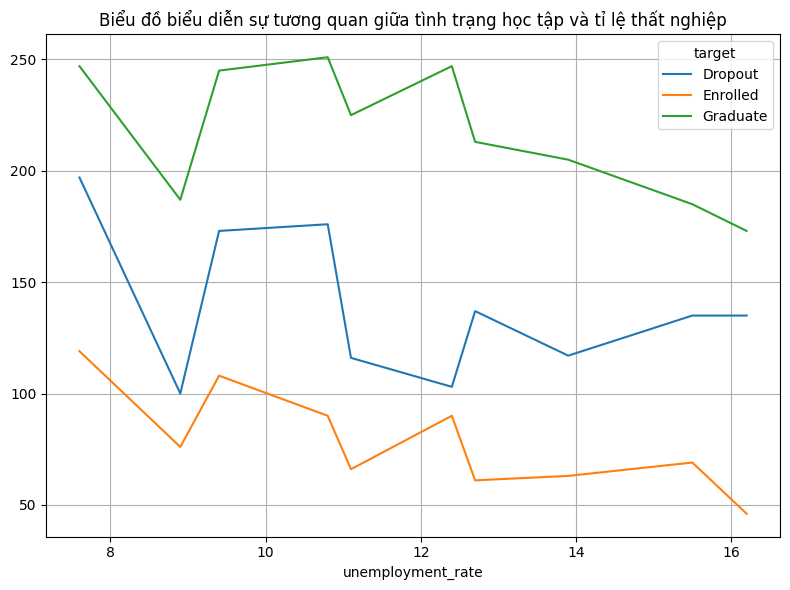

In [ ]:
pd.crosstab(df['unemployment_rate'],df['target']).plot(kind='line')
plt.title('Biểu đồ biểu diễn sự tương quan giữa tình trạng học tập và tỉ lệ thất nghiệp')
plt.tight_layout()
plt.grid()

<Figure size 800x600 with 0 Axes>

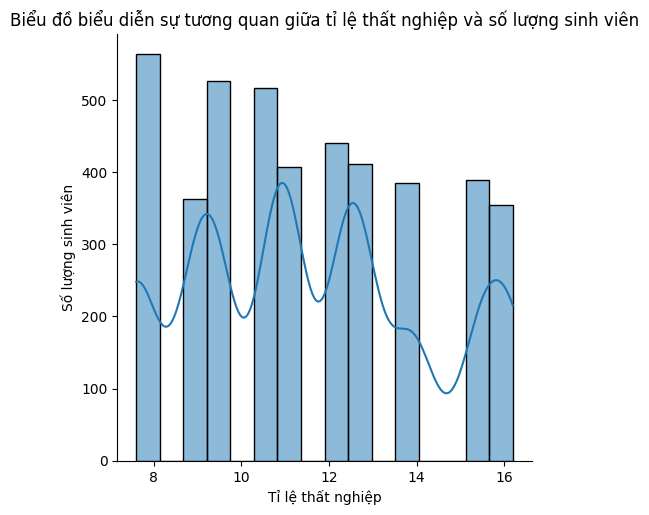

count    4355.000000
mean       11.560666
std         2.661801
min         7.600000
25%         9.400000
50%        11.100000
75%        13.900000
max        16.200000
Name: unemployment_rate, dtype: float64

In [ ]:
plt.figure(figsize=(8, 6))
sns.displot(data=df, x="unemployment_rate", kde=True)
plt.xlabel('Tỉ lệ thất nghiệp')
plt.ylabel('Số lượng sinh viên')
plt.title('Biểu đồ biểu diễn sự tương quan giữa tỉ lệ thất nghiệp và số lượng sinh viên')
plt.show()
df['unemployment_rate'].describe()

**4.2.2 Biểu đồ biểu diễn hồi quy giữa gdp và tỉ lệ thất nghiệpp**

Text(0.5, 1.0, 'Biểu đồ biểu diễn hồi quy giữa gdp và tỉ lệ thất nghiệp')

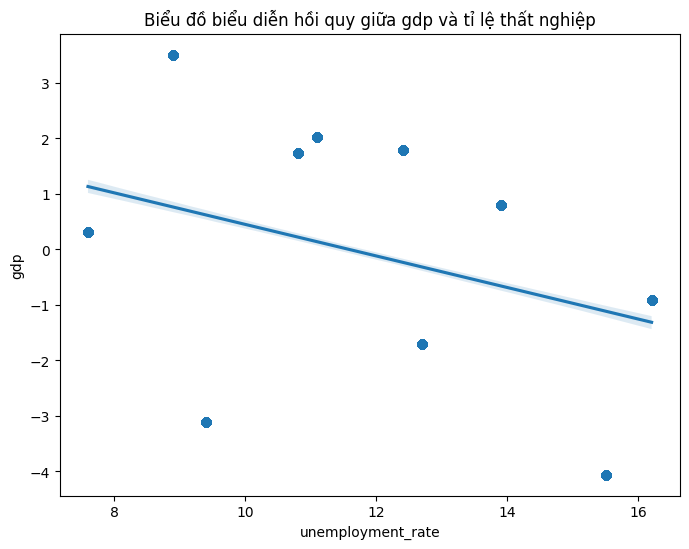

In [ ]:
sns.regplot(y="gdp",x='unemployment_rate',data=df)
plt.title('Biểu đồ biểu diễn hồi quy giữa gdp và tỉ lệ thất nghiệp')

**4.2.3 Biểu đồ biểu diễn hồi quy giữa tỉ lệ lạm phát và tỉ lệ thất nghiệp**

Text(0.5, 1.0, 'Biểu đồ biểu diễn hồi quy giữa tỉ lệ lạm phát và tỉ lệ thất nghiệp')

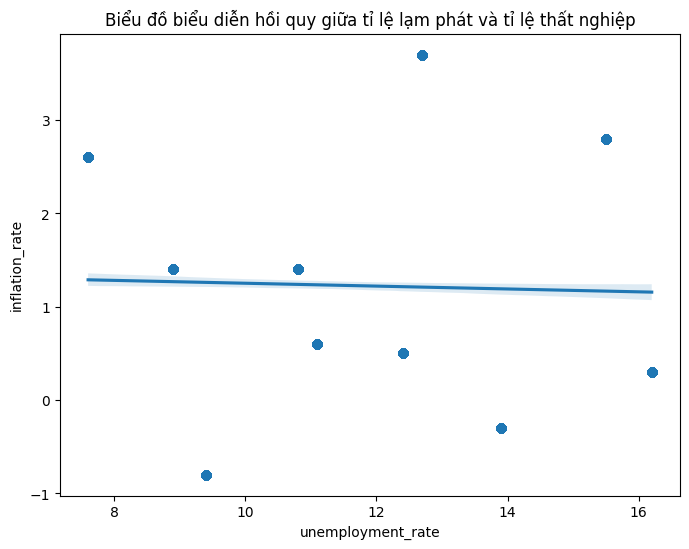

In [ ]:
sns.regplot(y="inflation_rate",x='unemployment_rate',data=df)
plt.title('Biểu đồ biểu diễn hồi quy giữa tỉ lệ lạm phát và tỉ lệ thất nghiệp')

**4.2.4 Biểu đồ biểu diễn sự tương quan giữa tỉ lệ lạm phát và số lượng sinh viên bỏ học**

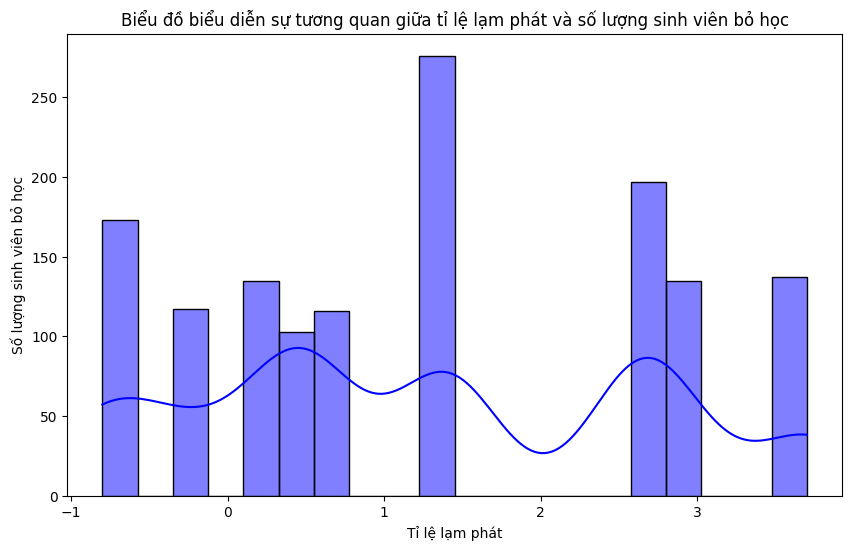

count    4355.000000
mean        1.226131
std         1.382299
min        -0.800000
25%         0.300000
50%         1.400000
75%         2.600000
max         3.700000
Name: inflation_rate, dtype: float64

In [ ]:
dropout_data = df[df['target'] == 'Dropout']
plt.figure(figsize=(10, 6))
sns.histplot(dropout_data['inflation_rate'], bins=20, color='blue',kde=True)
plt.xlabel('Tỉ lệ lạm phát')
plt.ylabel('Số lượng sinh viên bỏ học')
plt.title('Biểu đồ biểu diễn sự tương quan giữa tỉ lệ lạm phát và số lượng sinh viên bỏ học')
plt.show()
df['inflation_rate'].describe()

**4.2.5 Biểu đồ biểu diễn sự ảnh hưởng của tăng trưởng GDP tới khả năng nghỉ học của học sinh**

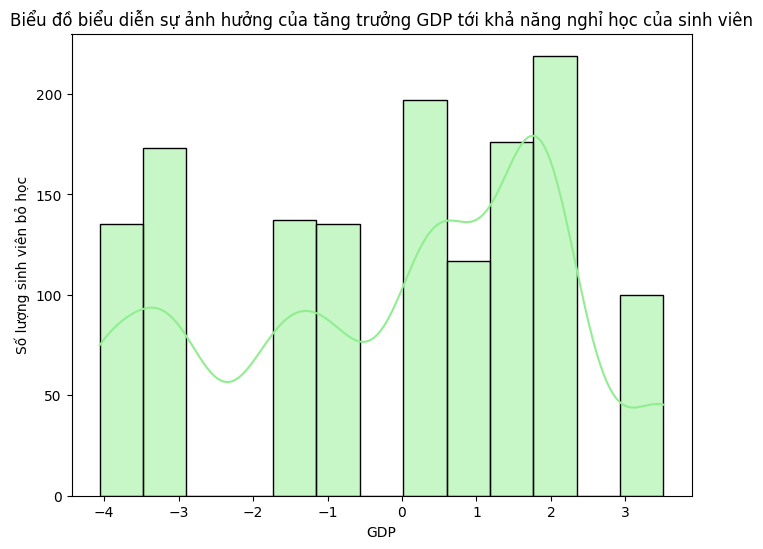

count    4355.000000
mean        0.005263
std         2.269489
min        -4.060000
25%        -1.700000
50%         0.320000
75%         1.790000
max         3.510000
Name: gdp, dtype: float64

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(dropout_data['gdp'], kde=True, color='lightgreen')
plt.xlabel('GDP')
plt.ylabel('Số lượng sinh viên bỏ học')
plt.title('Biểu đồ biểu diễn sự ảnh hưởng của tăng trưởng GDP tới khả năng nghỉ học của sinh viên')
plt.show()
df['gdp'].describe()

**4.2.6 Biểu đồ biểu diễn top 5 ngành nghề của phụ huynh có lượng sinh viên bỏ học nhiều nhất**

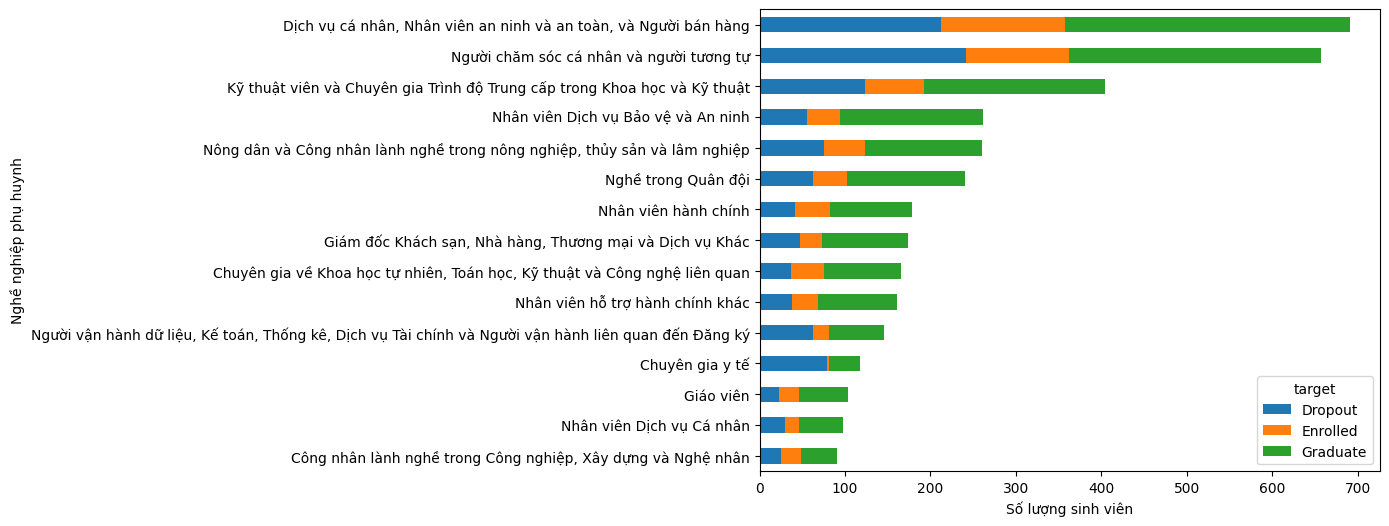

In [ ]:
student_foccupation = df.groupby(["parent_occupation", 'target']).size().reset_index().pivot(columns='target', index="parent_occupation", values=0)

student_foccupation = student_foccupation.rename(index={
    1: 'Sinh viên',
    2: 'Đại diện của Quyền lập pháp và Cơ quan Thực thi, Giám đốc, Giám đốc và Quản lý điều hành',
    3: 'Chuyên gia hoạt động trí tuệ và khoa học',
    4: 'Kỹ thuật viên và Nghề nghiệp Trình độ Trung cấp',
    5: 'Nhân viên hành chính',
    6: 'Dịch vụ cá nhân, Nhân viên an ninh và an toàn, và Người bán hàng',
    7: 'Nông dân và Công nhân lành nghề trong nông nghiệp, thủy sản và lâm nghiệp',
    8: 'Công nhân lành nghề trong Công nghiệp, Xây dựng và Nghệ nhân',
    9: 'Người lắp đặt và Người điều khiển máy và Công nhân lắp ráp',
    10: 'Người lao động không chuyên nghiệp',
    11: 'Nghề trong Quân đội',
    12: 'Tình hình khác',
    13: '(trống)',
    14: 'Sĩ quan Quân đội',
    15: 'Hạ sĩ quan Quân đội',
    16: 'Nhân viên Quân đội khác',
    17: 'Giám đốc Dịch vụ Hành chính và Thương mại',
    18: 'Giám đốc Khách sạn, Nhà hàng, Thương mại và Dịch vụ Khác',
    19: 'Chuyên gia về Khoa học tự nhiên, Toán học, Kỹ thuật và Công nghệ liên quan',
    20: 'Chuyên gia y tế',
    21: 'Giáo viên',
    22: 'Chuyên gia tài chính, Kế toán, Tổ chức hành chính và Quan hệ Công và Thương mại',
    23: 'Kỹ thuật viên và Chuyên gia Trình độ Trung cấp trong Khoa học và Kỹ thuật',
    24: 'Kỹ thuật viên và Chuyên gia Trình độ Trung cấp Y tế',
    25: 'Kỹ thuật viên Trình độ Trung cấp từ Dịch vụ Pháp lý, Xã hội, Thể thao, Văn hóa và Dịch vụ Tương tự',
    26: 'Kỹ thuật viên Công nghệ Thông tin và Truyền thông',
    27: 'Nhân viên văn phòng, Thư ký tổng hợp và Người điều hành xử lý dữ liệu',
    28: 'Người vận hành dữ liệu, Kế toán, Thống kê, Dịch vụ Tài chính và Người vận hành liên quan đến Đăng ký',
    29: 'Nhân viên hỗ trợ hành chính khác',
    30: 'Nhân viên Dịch vụ Cá nhân',
    31: 'Người bán hàng',
    32: 'Người chăm sóc cá nhân và người tương tự',
    33: 'Nhân viên Dịch vụ Bảo vệ và An ninh',
    34: 'Người nông dân thị trường và Công nhân nông nghiệp và chế biến động vật lành nghề',
    35: 'Người nông dân, Người chăn nuôi, Người đánh cá, Người săn mồi và Người hái lượm, và Người sống tự cung',
    36: 'Công nhân xây dựng lành nghề và Người lành nghề tương tự, trừ điện lạnh',
    37: 'Công nhân lành nghề trong Metal, Chế biến kim loại và Tương tự',
    38: 'Công nhân lành nghề trong Điện và Điện tử',
    39: 'Người lành nghề trong Chế biến thực phẩm, Chế biến gỗ và May mặc và Công nghiệp và Nghề nghiệp khác',
    40: 'Người vận hành thiết bị và Máy cố định',
    41: 'Người lành nghề lắp ráp',
    42: 'Người lái xe và Người vận hành thiết bị di động',
    43: 'Người lao động không chuyên nghiệp trong nông nghiệp, chế biến động vật và thủy sản và lâm nghiệp',
    44: 'Người lao động không chuyên nghiệp trong Công nghiệp khai thác, Xây dựng, Sản xuất và Giao thông',
    45: 'Người giúp việc chuẩn bị bữa ăn',
    46: 'Người bán hàng rong (ngoại trừ thức ăn) và Người cung cấp dịch vụ trên đường'
}
)

student_foccupation_total = student_foccupation.sum(axis=1)
student_foccupation_sorted = student_foccupation_total.sort_values(ascending=True)
student_foccupation_top10 = student_foccupation_sorted[36:]
student_foccupation.loc[student_foccupation_top10.index].plot(kind='barh', stacked=True)

plt.xlabel('Số lượng sinh viên')
plt.ylabel("Nghề nghiệp phụ huynh")
plt.show()

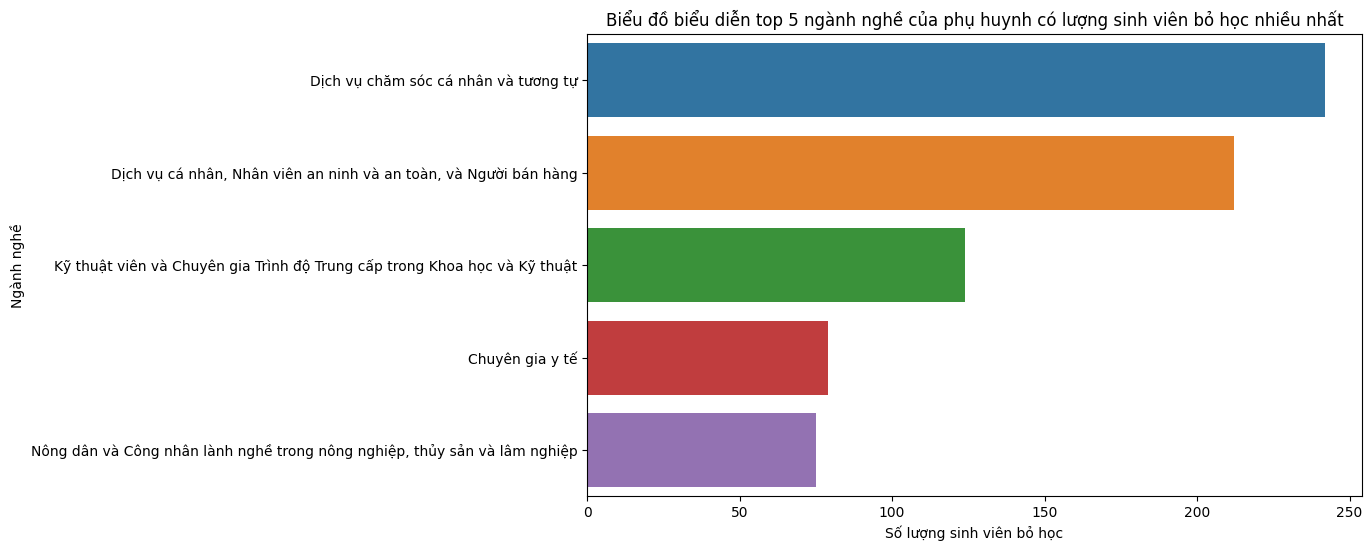

In [ ]:
dropout_data = df[df['target'] == 'Dropout'][['parent_occupation', 'target']]

occupation_mapping = {
    1: 'Sinh viên',
    2: 'Đại diện của Quyền lập pháp và Cơ quan Thực thi, Giám đốc, Giám đốc và Quản lý điều hành',
    3: 'Chuyên gia hoạt động trí tuệ và khoa học',
    4: 'Kỹ thuật viên và Nghề nghiệp Trình độ Trung cấp',
    5: 'Nhân viên hành chính',
    6: 'Dịch vụ cá nhân, Nhân viên an ninh và an toàn, và Người bán hàng',
    7: 'Nông dân và Công nhân lành nghề trong nông nghiệp, thủy sản và lâm nghiệp',
    8: 'Công nhân lành nghề trong Công nghiệp, Xây dựng và Nghệ nhân',
    9: 'Người lắp đặt và Người điều khiển máy và Công nhân lắp ráp',
    10: 'Người lao động không chuyên nghiệp',
    11: 'Nghề trong Quân đội',
    12: 'Tình hình khác',
    13: '(trống)',
    14: 'Sĩ quan Quân đội',
    15: 'Hạ sĩ quan Quân đội',
    16: 'Nhân viên Quân đội khác',
    17: 'Giám đốc Dịch vụ Hành chính và Thương mại',
    18: 'Giám đốc Khách sạn, Nhà hàng, Thương mại và Dịch vụ Khác',
    19: 'Chuyên gia về Khoa học tự nhiên, Toán học, Kỹ thuật và Công nghệ liên quan',
    20: 'Chuyên gia y tế',
    21: 'Giáo viên',
    22: 'Chuyên gia tài chính, Kế toán, Tổ chức hành chính và Quan hệ Công và Thương mại',
    23: 'Kỹ thuật viên và Chuyên gia Trình độ Trung cấp trong Khoa học và Kỹ thuật',
    24: 'Kỹ thuật viên và Chuyên gia Trình độ Trung cấp Y tế',
    25: 'Kỹ thuật viên Trình độ Trung cấp từ Dịch vụ Pháp lý, Xã hội, Thể thao, Văn hóa và Dịch vụ Tương tự',
    26: 'Kỹ thuật viên Công nghệ Thông tin và Truyền thông',
    27: 'Nhân viên văn phòng, Thư ký tổng hợp và Người điều hành xử lý dữ liệu',
    28: 'Người vận hành dữ liệu, Kế toán, Thống kê, Dịch vụ Tài chính và Người vận hành liên quan đến Đăng ký',
    29: 'Nhân viên hỗ trợ hành chính khác',
    30: 'Nhân viên Dịch vụ Cá nhân',
    31: 'Người bán hàng',
    32: 'Dịch vụ chăm sóc cá nhân và tương tự',
    33: 'Nhân viên Dịch vụ Bảo vệ và An ninh',
    34: 'Người nông dân thị trường và Công nhân nông nghiệp và chế biến động vật lành nghề',
    35: 'Người nông dân, Người chăn nuôi, Người đánh cá, Người săn mồi và Người hái lượm, và Người sống tự cung',
    36: 'Công nhân xây dựng lành nghề và Người lành nghề tương tự, trừ điện lạnh',
    37: 'Công nhân lành nghề trong Metal, Chế biến kim loại và Tương tự',
    38: 'Công nhân lành nghề trong Điện và Điện tử',
    39: 'Người lành nghề trong Chế biến thực phẩm, Chế biến gỗ và May mặc và Công nghiệp và Nghề nghiệp khác',
    40: 'Người vận hành thiết bị và Máy cố định',
    41: 'Người lành nghề lắp ráp',
    42: 'Người lái xe và Người vận hành thiết bị di động',
    43: 'Người lao động không chuyên nghiệp trong nông nghiệp, chế biến động vật và thủy sản và lâm nghiệp',
    44: 'Người lao động không chuyên nghiệp trong Công nghiệp khai thác, Xây dựng, Sản xuất và Giao thông',
    45: 'Người giúp việc chuẩn bị bữa ăn',
    46: 'Người bán hàng rong (ngoại trừ thức ăn) và Người cung cấp dịch vụ trên đường'
}

dropout_data['parent_occupation'] = dropout_data['parent_occupation'].map(occupation_mapping)

top_occupations = dropout_data['parent_occupation'].value_counts().head(5).index.tolist()

filtered_data = dropout_data[dropout_data['parent_occupation'].isin(top_occupations)]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, y='parent_occupation', order=top_occupations)
plt.title('Biểu đồ biểu diễn top 5 ngành nghề của phụ huynh có lượng sinh viên bỏ học nhiều nhất')
plt.xlabel('Số lượng sinh viên bỏ học')
plt.ylabel('Ngành nghề')
plt.show()

### 4.3 Tình hình học tập

In [ ]:
course_mapping ={
    1: "Công nghệ Sản xuất Nhiên liệu Sinh học",
    2: "Thiết kế Hoạt hình và Đa phương tiện",
    3: "Dịch vụ Xã hội (buổi tối)",
    4: "Nông học",
    5: "Thiết kế Truyền thông",
    6: "Điều dưỡng Thú y",
    7: "Kỹ thuật Thông tin",
    8: "Nuôi ngựa",
    9: "Quản lý",
    10: "Dịch vụ Xã hội",
    11: "Du lịch",
    12: "Điều dưỡng",
    13: "Vệ sinh Răng miệng",
    14: "Quản lý Quảng cáo và Tiếp thị",
    15: "Báo chí và Truyền thông",
    16: "Giáo dục Cơ bản",
    17: "Quản lý (buổi tối)"}

In [ ]:
field_mapping = {'Công nghệ và Thiết kế': [1, 2, 5, 7],
 'Quản trị và Dịch vụ Xã hội': [3, 9, 10, 17],
 'Nông nghiệp và Thú y': [4, 6, 8],
 'Truyền thông và Giáo dục': [11, 14, 15, 16],
 'Y tế và Chăm sóc sức khỏe': [12,13]}

def map_to_field(index):
    for field, indices in field_mapping.items():
        if index in indices:
            return field
    return 'Other'

df['field'] = df['course'].apply(map_to_field)

**4.3.1 Biểu đồ thể hiện độ tuổi trung bình giữa các ngành học**

In [ ]:
!pip install joypy

In [ ]:
from joypy import joyplot

**4.3.1 Biểu đồ biểu diễn sự phân phối của độ tuổi theo các nhóm ngành**

<Figure size 1200x800 with 0 Axes>

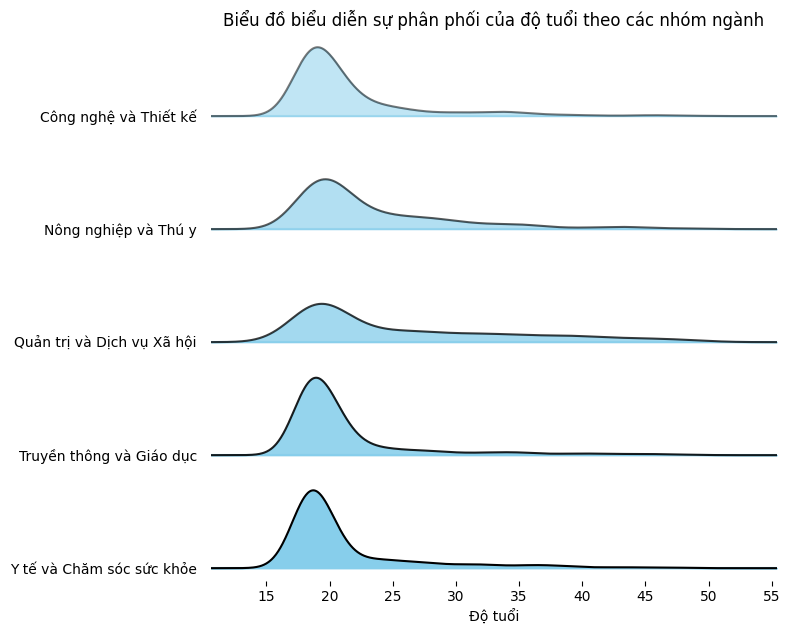

In [ ]:
plt.figure(figsize=(12, 8))
joyplot(data=df, by='field', column='age_at_enrollment', color='skyBlue', fade=True)
plt.xlabel('Độ tuổi')
plt.ylabel('Khu vực')
plt.title('Biểu đồ biểu diễn sự phân phối của độ tuổi theo các nhóm ngành')
plt.subplots_adjust(hspace=0.2)
plt.show()

**4.3.2 Biểu đồ biểu diễn số lượng tín chỉ trung bình của sinh viên theo các nhóm ngành**

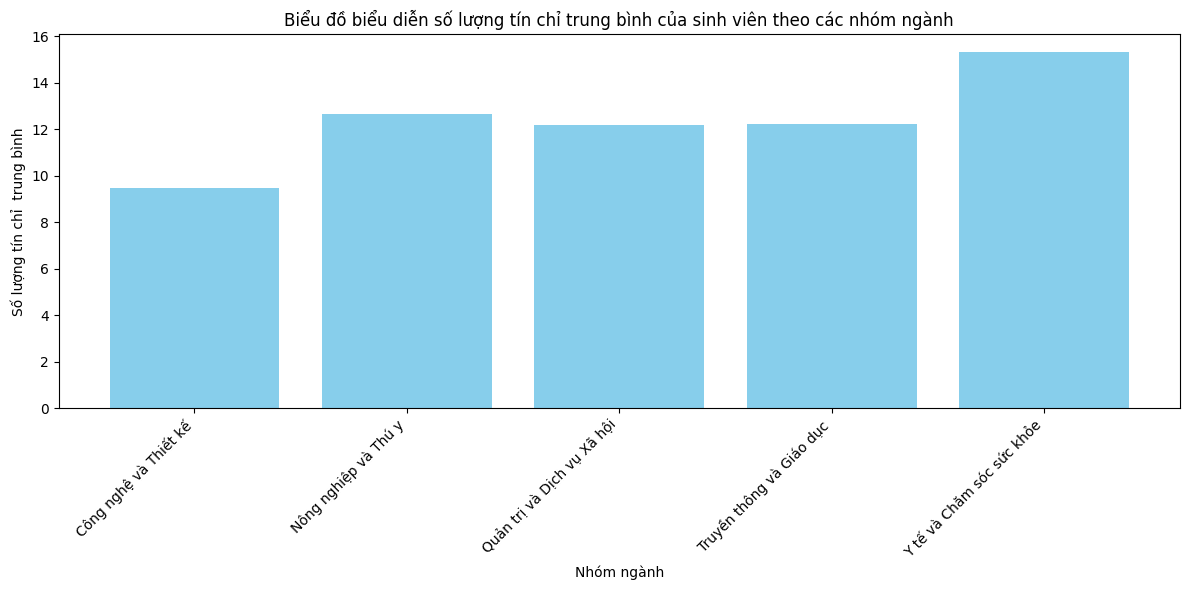

In [ ]:
mean_credits_by_course = df.groupby('field')['curicular_units_enrolled'].mean()
plt.figure(figsize=(12, 6))
plt.bar(mean_credits_by_course.index, mean_credits_by_course, color='skyblue')
plt.xlabel('Nhóm ngành')
plt.ylabel('Số lượng tín chỉ  trung bình')
plt.title('Biểu đồ biểu diễn số lượng tín chỉ trung bình của sinh viên theo các nhóm ngành')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**4.3.3 Biểu đồ biểu diễn sự phân bố điểm số cả năm theo tuổi và trạng thái học tập của sinh viên**

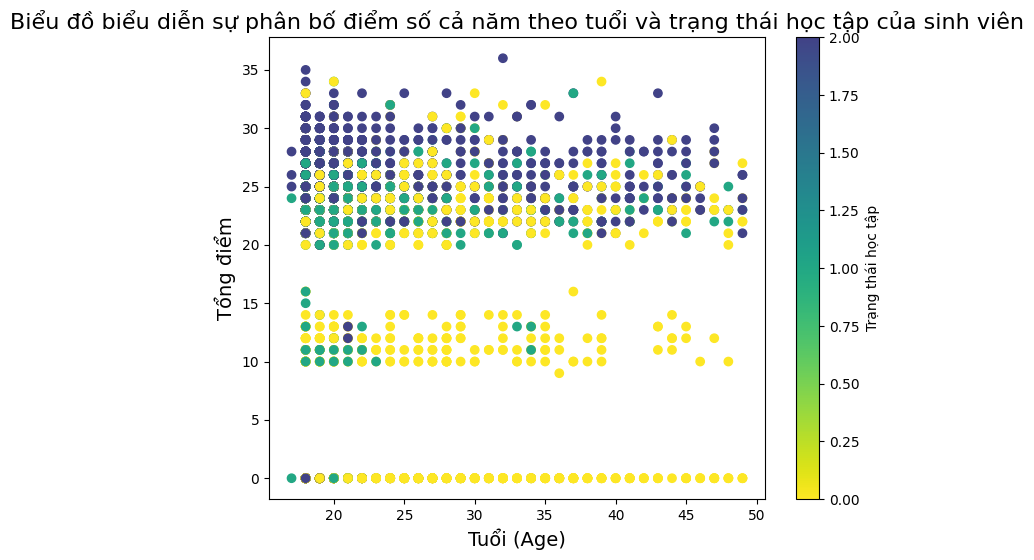

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
target_values = df['target'].astype('category').cat.codes
viridis_colors = plt.cm.viridis(range(50, 256))
viridis_colors = viridis_colors[::-1]
custom_cmap = LinearSegmentedColormap.from_list('BlueGreenViridis', viridis_colors)
scatter = plt.scatter(x="age_at_enrollment", y="curicular_units_grade", c=target_values, cmap=custom_cmap, data=df)
plt.colorbar(scatter, label='Trạng thái học tập')
plt.xlabel('Tuổi (Age)', fontsize=14)
plt.ylabel('Tổng điểm', fontsize=14)
plt.title('Biểu đồ biểu diễn sự phân bố điểm số cả năm theo tuổi và trạng thái học tập của sinh viên', fontsize=16)
plt.show()

**4.3.4 Biểu đồ biểu diễn tỉ lệ bỏ học của các nhóm ngành học**

In [ ]:
course_dropout_rate = df[df['target'] == 'Dropout'].groupby('course')['target'].count()
course_dropout_rate = course_dropout_rate.rename(index=course_mapping)

plt.figure(figsize=(12, 9))
pie_course_dropout = pd.DataFrame({'Ngành học': course_dropout_rate.index, 'Dropout Percentage': course_dropout_rate.values})
fig = px.pie(pie_course_dropout, names='Ngành học', values='Dropout Percentage', title='Biểu đồ biểu diễn tỉ lệ sinh viên bỏ học theo ngành học')
fig.update_traces(hole=0.4, textinfo='percent+label', pull=[0, 0.2, 0.1])
fig.show()

<Figure size 1200x900 with 0 Axes>

In [ ]:
df['field'] = df['course'].apply(map_to_field)
plt.figure(figsize=(12, 9))
field_counts = df[df['target'] == 'Dropout'].groupby('field')['target'].count()
field_counts_df = pd.DataFrame({'Nhóm học': field_counts.index, 'Dropout Percentage': field_counts.values})
fig = px.pie(field_counts_df, names='Nhóm học', values='Dropout Percentage', title='Biểu đồ thể hiện phần trăm sinh viên bỏ học theo nhóm ngành học')
fig.update_traces(hole=0.4, textinfo='percent+label', pull=[0, 0.2, 0.1])
fig.update_layout(width=800, height=600)
fig.write_html("dropout_percentage_chart.html")
fig.show()

<Figure size 1200x900 with 0 Axes>

**4.3.5Biểu đồ biểu diễn số lượng trung bình các đơn vị học phần đã được tính tín chỉ theo trạng thái học**

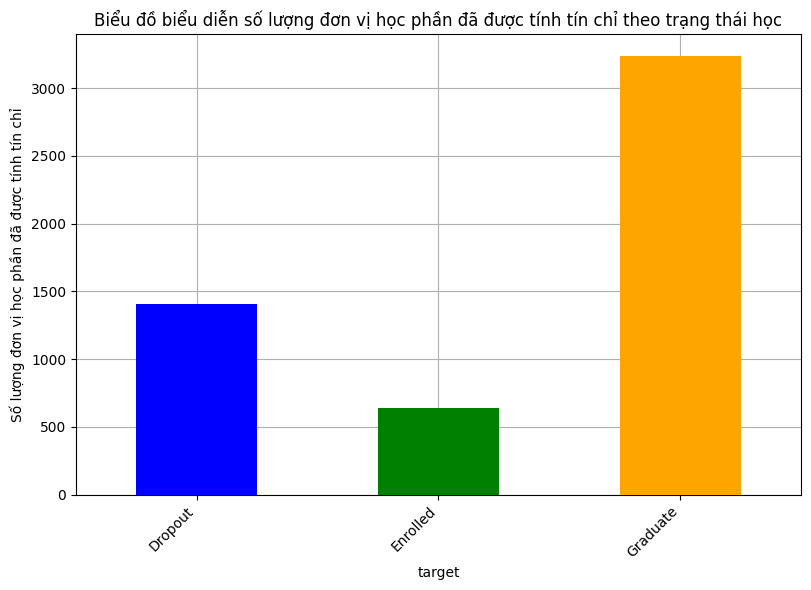

In [ ]:
import matplotlib.pyplot as plt
target_units_enrolled_mean = df.groupby('target')['curicular_units_credited'].sum()
colors = ['blue', 'green', 'orange']
target_units_enrolled_mean.plot(kind='bar', color=colors, zorder=3)
plt.grid(zorder=0)
plt.title('Biểu đồ biểu diễn số lượng đơn vị học phần đã được tính tín chỉ theo trạng thái học')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylabel('Số lượng đơn vị học phần đã được tính tín chỉ')

plt.show()

**4.3.6 Biểu đồ thể hiện số lượng sinh viên nghỉ học theo các ngành, nhóm ngành**

In [ ]:
import pandas as pd
import plotly.express as px

course_graduates = df[df['target'] == 'Dropout'].groupby(['field', 'course'])['target'].count()
course_graduates = course_graduates.rename(index=course_mapping)
top_courses_dropouts = course_graduates.sort_values(ascending=False)

fig = px.treemap(top_courses_dropouts.reset_index(),
                 path=['field', 'course'],
                 values='target',
                 title='Biểu đồ biểu diễn số lượng sinh viên nghỉ học theo các ngành, nhóm ngành',
                 width=1000, height=600)
fig.update_traces(
    textfont=dict(family="Arial", size=14),
    textposition='middle center',
    hovertemplate='<b>%{label}</b><br>Số lượng sinh viên nghỉ học: %{value}',
    hoverlabel=dict(bgcolor='rgba(255, 255, 255, 0.4)'),
    marker_line=dict(color='black', width=1))
fig.show()

**4.3.7 Biểu đồ biểu diễn số lượng sinh viên theo Giới tính, Cấp bậc, Tình trạng nợ, Tình trạng học**

In [ ]:
df['debtor_decode'] = df['debtor'].replace({1: 'Yes', 0: 'No'})

In [ ]:
scholarship_gender = df[df['scholarship_holder'] == 1].groupby('gender_decode')['scholarship_holder'].count()
female_scholar_holder = scholarship_gender['Nữ'] * 100 / scholarship_gender.sum()
male_scholar_holder = scholarship_gender['Nam'] * 100 / scholarship_gender.sum()

In [ ]:
educational_level_mapping = {
    'Trung học': [1],
    'Đại học': [2, 3, 4, 6],
    'Dưới trung học': [7, 8, 9, 10],
    'Dưới trung học': [11, 12, 13],
    'Cao học': [14, 15, 16, 17],
}

color_map = {
    'Dropout': 'black',
    'Enrolled': 'orange',
    'Graduate': 'green',
}

df['color'] = df['target'].map(color_map)

def map_to_educational_level(index):
    for educational_level, indices in educational_level_mapping.items():
        if index in indices:
            return educational_level
    return 'Other'

df['educational_level'] = df['previous_qualification'].apply(map_to_educational_level)
fig = px.parallel_categories(df,
    dimensions=['gender_decode','educational_level', 'debtor', 'target'],
    color='color',
    labels={'gender_decode': 'Giới tính', 'educational_level': 'Cấp bậc học', 'debtor': 'Tình trạng nợ', 'target': 'Tình trạng học'},
    title='Biểu đồ biểu diễn số lượng sinh viên theo Giới tính, Cấp bậc, Tình trạng nợ, Tình trạng học',
    width=1200
)

fig.update_traces(line_shape='hspline', hoverinfo='count+probability')
# fig.write_html("fig.html")
fig.show()

**4.3.8 Biểu đổ biểu diễn sự phân phối của điểm số theo học bổng**

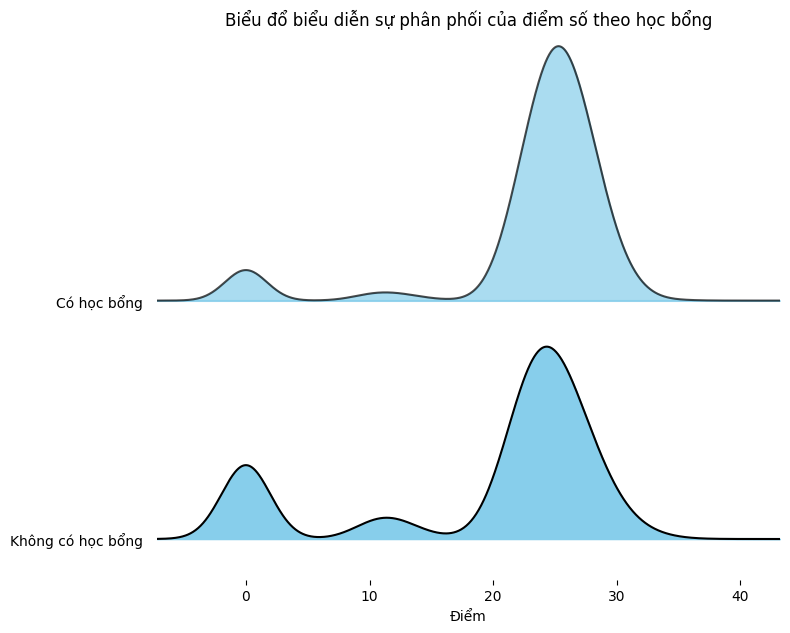

In [ ]:
scholarship_holder_mapped = df['scholarship_holder'].replace({0: 'Không có học bổng',1: 'Có học bổng'})
joyplot(df, by = scholarship_holder_mapped,column='curicular_units_grade' , color = 'skyblue', fade = True)
plt.xlabel('Điểm')
plt.ylabel('')
plt.title('Biểu đổ biểu diễn sự phân phối của điểm số theo học bổng')
plt.show()

**4.3.9 Biểu đồ biểu diễn tỉ lệ đạt được học bổng giữa hai giới**

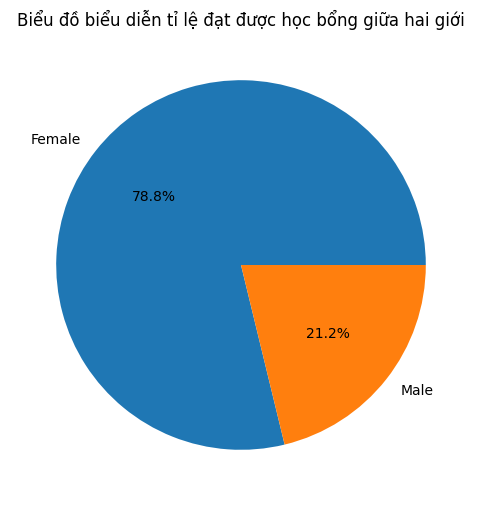

In [ ]:
# Now create the pie chart using matplotlib
sizes = [female_scholar_holder, male_scholar_holder]
labels = ['Female', 'Male']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Biểu đồ biểu diễn tỉ lệ đạt được học bổng giữa hai giới')
plt.show()

# **CHƯƠNG V: Kiểm định**

## Tài nguyên

In [ ]:
import matplotlib.pyplot         as plt
import numpy                     as np
import pandas                    as pd
import scipy.stats               as stats
import seaborn                   as sbn
import statsmodels.api           as sm

from statsmodels.formula.api     import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import seaborn as sns
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.stats import f_oneway
import statsmodels.formula.api as sm
import pickle
import warnings
from scipy.stats import chi2_contingency
from scipy.stats import chi2
warnings.filterwarnings('ignore')

## 5.1 Kiểm định theo nhân khẩu học

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest as ztest

### Giả thuyết 1: Sinh viên khi tham gia vào hoạt động hôn nhân hay không cũng không ảnh hưởng tới quyết định nghỉ học.

In [ ]:
df['Marital_status'] = df['marital_status'].replace({
    1.0: 'Độc thân',
    2.0: 'Tham gia hôn nhân',
    3.0: 'Tham gia hôn nhân',
    4.0: 'Tham gia hôn nhân',
    5.0: 'Tham gia hôn nhân',
    6.0: 'Tham gia hôn nhân'
})

In [ ]:
Marital=df[['target','Marital_status']]
crosstab_marital = pd.crosstab(Marital["target"], Marital["Marital_status"])
crosstab_marital

Marital_status,Tham gia hôn nhân,Độc thân
target,,
Dropout,215,1174
Enrolled,71,717
Graduate,178,2000


In [ ]:
stat, p, dof, expected = chi2_contingency(crosstab_marital)
print('Degress of freedom = %d' % dof)

Degress of freedom = 2


In [ ]:
contingency_table = pd.crosstab(df['Marital_status'], df['target'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Có đủ bằng chứng để bác bỏ H0.")
else:
    print("Không đủ bằng chứng để bác bỏ H0.")

Chi-squared statistic: 50.29099293356022
P-value: 1.2007418284336653e-11
Có đủ bằng chứng để bác bỏ H0.


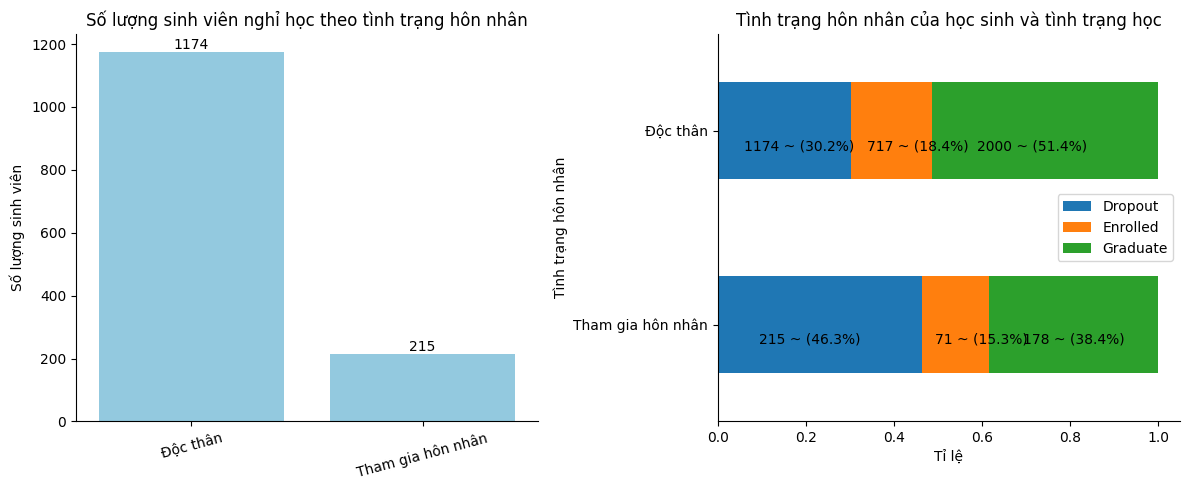

In [ ]:
fig = plt.figure(figsize=(12, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)
# Create a bar plot.
ax1 = fig.add_subplot(gs[0, 0])
data = df[df['target'] == 'Dropout']['Marital_status'].value_counts()
order = data.index
ax1 = sns.barplot(data=data.to_frame(), y='Marital_status', x=data.index, color='skyblue', order=order)
ax1.set(xlabel=None, ylabel='Số lượng sinh viên')
ax1.bar_label(container=ax1.containers[0], labels=data)
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Số lượng sinh viên nghỉ học theo tình trạng hôn nhân')
plt.xticks(rotation=15)

# Create a stacked bar plot.
ax2 = fig.add_subplot(gs[0, 1])
data = pd.crosstab(index=df['Marital_status'], columns=df['target'])
data_prop = pd.crosstab(index=df['Marital_status'], columns=df['target'], normalize='index')
data_prop.loc[order[::-1]].plot(ax=ax2, kind='barh', stacked=True)
ax2.set(xlabel='Tỉ lệ', ylabel='Tình trạng hôn nhân')
ax2.spines[['right', 'top']].set_visible(False)
ax2.legend_.set_title(None)
ax2.set_title('Tình trạng hôn nhân của học sinh và tình trạng học')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.1, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

## 5.2 Kiểm định theo tình hình kinh tế

### Giả thuyết 1: Mức độ tăng giảm tỉ lệ lạm phát của nền kinh tế không ảnh hưởng tới quyết định nghỉ học của sinh.

In [ ]:
df2 = df[['target', 'inflation_rate']]
# Chia dữ liệu thành 2 nhóm: Bỏ học (Dropout) và Có học (Graduate, Enrolled)
dropout_group = df2[df2["target"] == 'Dropout']["inflation_rate"].dropna()
enrolled_graduate_group = df2[df2["target"].isin(["Enrolled", "Graduate"])]["inflation_rate"].dropna()
# Đối với z-test, cần biết độ lệch chuẩn của cả hai nhóm
std_dropout = dropout_group.std()
std_enrolled_graduate = enrolled_graduate_group.std()

# Thực hiện kiểm định z-test
z_statistic, p_value_z = ztest(dropout_group, enrolled_graduate_group, value=0, alternative='two-sided')

print("Z-statistic:", z_statistic)
print("Giá trị p (z-test):", p_value_z)

alpha = 0.05
if p_value_z < alpha:
    print("Có đủ bằng chứng để bác bỏ H0.")
else:
    print("Không đủ bằng chứng để bác bỏ H0.")

Z-statistic: 1.611581534998867
Giá trị p (z-test): 0.10705303147005597
Không đủ bằng chứng để bác bỏ H0.


## 5.3 Kiểm định theo tình hình học tập

### Giả thuyết: Kiểm định sự phụ thuộc của số tín chỉ đăng ký theo nhóm ngành học của sinh viên:

In [ ]:
df3=df[['curicular_units_credited','field']]
crosstab_units_field = pd.crosstab(df3["curicular_units_credited"], df3['field'])
crosstab_units_field.head()

field,Công nghệ và Thiết kế,Nông nghiệp và Thú y,Quản trị và Dịch vụ Xã hội,Truyền thông và Giáo dục,Y tế và Chăm sóc sức khỏe
curicular_units_credited,,,,,
0,504,522,964,980,802
1,15,18,14,4,7
2,6,32,13,3,8
3,4,25,5,3,5
4,7,4,10,7,1


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

In [ ]:
field_data = {}
for field in df['field'].unique():
    field_data[field] = df[df['field'] == field]['curicular_units_enrolled']
anova_result = f_oneway(*field_data.values())
print("ANOVA Result:")
print(anova_result)
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thuyết H0.")
else:
    print("Không đủ bằng chứng để bác bỏ giả thuyết H0.")

ANOVA Result:
F_onewayResult(statistic=174.37477187407427, pvalue=1.0061466881517475e-138)
Có đủ bằng chứng để bác bỏ giả thuyết H0.


In [ ]:
# Thực hiện kiểm định Turkey HSD
tukey_results = pairwise_tukeyhsd(df['curicular_units_enrolled'], df['field'])
print("\nTukey's HSD Results:")
print(tukey_results)


Tukey's HSD Results:
                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
          group1                     group2           meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------------
     Công nghệ và Thiết kế       Nông nghiệp và Thú y   3.1749    0.0  2.5309 3.8189   True
     Công nghệ và Thiết kế Quản trị và Dịch vụ Xã hội   2.6853    0.0    2.11 3.2606   True
     Công nghệ và Thiết kế   Truyền thông và Giáo dục   2.7306    0.0  2.1409 3.3204   True
     Công nghệ và Thiết kế  Y tế và Chăm sóc sức khỏe   5.8324    0.0  5.2196 6.4452   True
      Nông nghiệp và Thú y Quản trị và Dịch vụ Xã hội  -0.4896 0.1171 -1.0477 0.0685  False
      Nông nghiệp và Thú y   Truyền thông và Giáo dục  -0.4443 0.2134 -1.0173 0.1287  False
      Nông nghiệp và Thú y  Y tế và Chăm sóc sức khỏe   2.6575    0.0  2.0608 3.2542   True
Quản trị và Dịch vụ Xã hội   Truyền thông và Giáo dục   0.

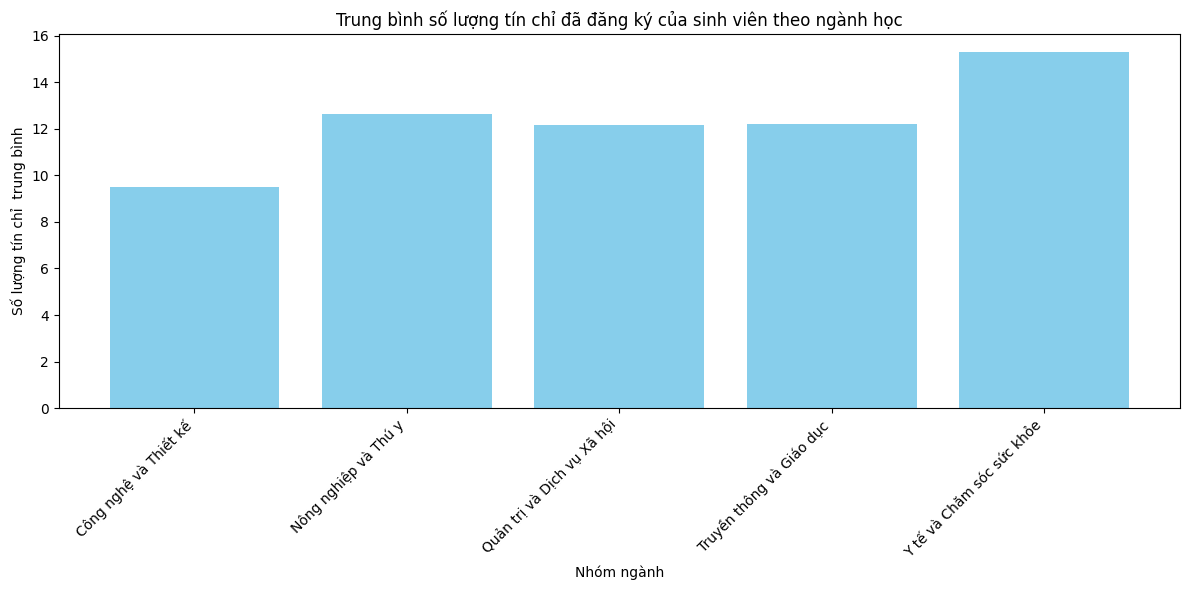

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
mean_credits_by_course = df.groupby('field')['curicular_units_enrolled'].mean()
plt.figure(figsize=(12, 6))
plt.bar(mean_credits_by_course.index, mean_credits_by_course, color='skyblue')
plt.xlabel('Nhóm ngành')
plt.ylabel('Số lượng tín chỉ  trung bình')
plt.title('Trung bình số lượng tín chỉ đã đăng ký của sinh viên theo ngành học')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()